In [1]:
import sys
sys.path.insert(0, '/home/cholobetz/projects/torch_tem/src')
print(sys.path)

['/home/cholobetz/projects/torch_tem/src', '/home/cholobetz/projects/torch_tem', '/home/cholobetz/anaconda3/envs/tem_pt/lib/python39.zip', '/home/cholobetz/anaconda3/envs/tem_pt/lib/python3.9', '/home/cholobetz/anaconda3/envs/tem_pt/lib/python3.9/lib-dynload', '', '/home/cholobetz/anaconda3/envs/tem_pt/lib/python3.9/site-packages', '/home/cholobetz/anaconda3/envs/tem_pt/lib/python3.9/site-packages/IPython/extensions', '/home/cholobetz/.ipython']


In [2]:
import torch
import numpy as np
import test
import matplotlib.pyplot as plt
from matplotlib import cm
from time import time
import analyse
from importlib import reload
from itertools import permutations
import world
import glob
import plot
from scipy.sparse.csgraph import shortest_path
from copy import deepcopy

In [ ]:
def trajectory_len(trajectory):
    return abs(trajectory[1] - trajectory[0]) * 2 + 6

In [ ]:
def make_trajectory_dict():
    trajectories = permutations(np.arange(6), r=2)
    trajectory_dict = {}
    for traj_idx, traj in enumerate(trajectories):
        trajectory_dict[traj] = traj_idx
    return trajectory_dict

In [ ]:
def locations_in_trajectory(trajectory, environment):
    
    adjacency = np.array(self.adjacency) 
    dists, pred = shortest_path(adjacency, directed=False, method='FW', return_predecessors=True)

    trajectory_locs = [environment.locations[state_id] for state_id in self.get_path(pred, curr_arm_end_state, new_arm_end_state)][1:]
    

In [ ]:
def print_proper_time(seconds):
    # hours
    if seconds > 3600:
        output_str = '{0} hours'.format(seconds / 3600)
    # minutes
    elif seconds > 60:
        output_str = '{0} minutes'.format(seconds / 60)
    # seconds
    else:
        output_str = '{0} seconds'.format(seconds)
    return 'Finished running in ' + output_str

In [ ]:
IDX = '47000'

In [ ]:
# 2022-04-21; run0 uses purely sweeping policy
DATE = '2022-04-21'
RUN = '0'
PATH = '/cumulus/cristofer/TEM_data/{0}/run{1}/model/'.format(DATE, RUN)
SAVE_DIR = '/cumulus/cristofer/TEM_figs/{0}/run{1}/'.format(DATE, RUN)

In [ ]:
params = torch.load('/cumulus/cristofer/TEM_data/' + DATE + '/run' + RUN + '/model/params_' + IDX + '.pt')

# Make list of all the environments that this model was trained on
env_list = list(glob.iglob('/cumulus/cristofer/TEM_data/' + DATE + '/run' + RUN + '/script/envs/*'))

# Set which environments will include shiny objects
shiny_envs = [False, False, False, False]
# Set the number of walks to execute in parallel (batch size)
n_walks = len(shiny_envs)
# Select environments from the environments included in training
environments = [world.World(graph, randomise_observations=params['randomise_observations'], shiny=(params['shiny'] if shiny_envs[env_i] else None), specify_behavior=params['specify_behavior'], behavior_type=params['behavior_type'], seed=0) for env_i, graph in enumerate(np.random.choice(env_list, n_walks))]


In [ ]:
fwd, mod, envs = test.get_forward(date=DATE, run=RUN, env_to_plot=0, index=IDX, seed=0)

In [ ]:
all_g_sweep, all_p_sweep = analyse.trajectories_rate_maps(fwd, mod, envs)

In [ ]:
np.array(all_p_sweep[0][0][0])[:, 0]

In [ ]:
fig, ax = plt.subplots()#figsize=(100, 100))

im = plt.imread(SAVE_DIR + 'index_{0}_seed_0_performance.png'.format(IDX))

ax.imshow(im)

In [ ]:
fig, ax = plt.subplots(figsize=(100, 100))

im = plt.imread(SAVE_DIR + 'index_{0}_seed_0_Hippocampal_cells.png'.format(IDX))

ax.imshow(im)

In [ ]:
FREQUENCY = 0
plot.plot_single_frequency_all_cells_all_trajectories(all_p_sweep[0], frequency=FREQUENCY, environment=environments[0])

In [ ]:
FREQUENCY = 1
plot.plot_single_frequency_all_cells_all_trajectories(all_p_sweep[0], frequency=FREQUENCY, environment=environments[0])

In [ ]:
FREQUENCY = 2
plot.plot_single_frequency_all_cells_all_trajectories(all_p_sweep[0], frequency=FREQUENCY, environment=environments[0])

In [ ]:
FREQUENCY = 3
plot.plot_single_frequency_all_cells_all_trajectories(all_p_sweep[0], frequency=FREQUENCY, environment=environments[0])

In [ ]:
FREQUENCY = 4
plot.plot_single_frequency_all_cells_all_trajectories(all_p_sweep[0], frequency=FREQUENCY, environment=environments[0])

In [3]:
IDX2 = '39000'

In [4]:
# 2022-04-21; run1 uses random arm policy
DATE = '2022-04-21'
RUN = '1'
PATH = '/cumulus/cristofer/TEM_data/{0}/run{1}/model/'.format(DATE, RUN)
SAVE_DIR = '/cumulus/cristofer/TEM_figs/{0}/run{1}/'.format(DATE, RUN)

In [5]:
params = torch.load('/cumulus/cristofer/TEM_data/' + DATE + '/run' + RUN + '/model/params_' + IDX2 + '.pt')

# Make list of all the environments that this model was trained on
env_list = list(glob.iglob('/cumulus/cristofer/TEM_data/' + DATE + '/run' + RUN + '/script/envs/*'))

# Set which environments will include shiny objects
shiny_envs = [False, False, False, False]
# Set the number of walks to execute in parallel (batch size)
n_walks = len(shiny_envs)
# Select environments from the environments included in training
environments = [world.World(graph, randomise_observations=params['randomise_observations'], shiny=(params['shiny'] if shiny_envs[env_i] else None), specify_behavior=params['specify_behavior'], behavior_type=params['behavior_type'], seed=0) for env_i, graph in enumerate(np.random.choice(env_list, n_walks))]



In [6]:
fwd, mod, envs = test.get_forward(date=DATE, run=RUN, env_to_plot=0, index=IDX2, seed=0)

In [7]:
all_g_random, all_p_random = analyse.trajectories_rate_maps(fwd, mod, envs)

In [8]:
np.array(all_p_random[0][0][0])[:, 0]

array([-9.99000000e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.62006831e-04,  0.00000000e+00,  0.00000000e+00, -7.65661709e-04,
       -6.59449317e-04, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
       -9.99000000e+02, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
       -9.99000000e+02, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
       -9.99000000e+02, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
       -9.99000000e+02, -9.99000000e+02, -9.99000000e+02, -9.99000000e+02,
       -9.99000000e+02])

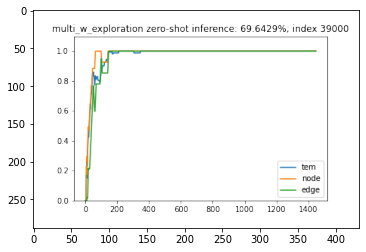

In [9]:
fig, ax = plt.subplots()#figsize=(100, 100))

im = plt.imread(SAVE_DIR + 'index_{0}_seed_0_performance.png'.format(IDX2))

ax.imshow(im)

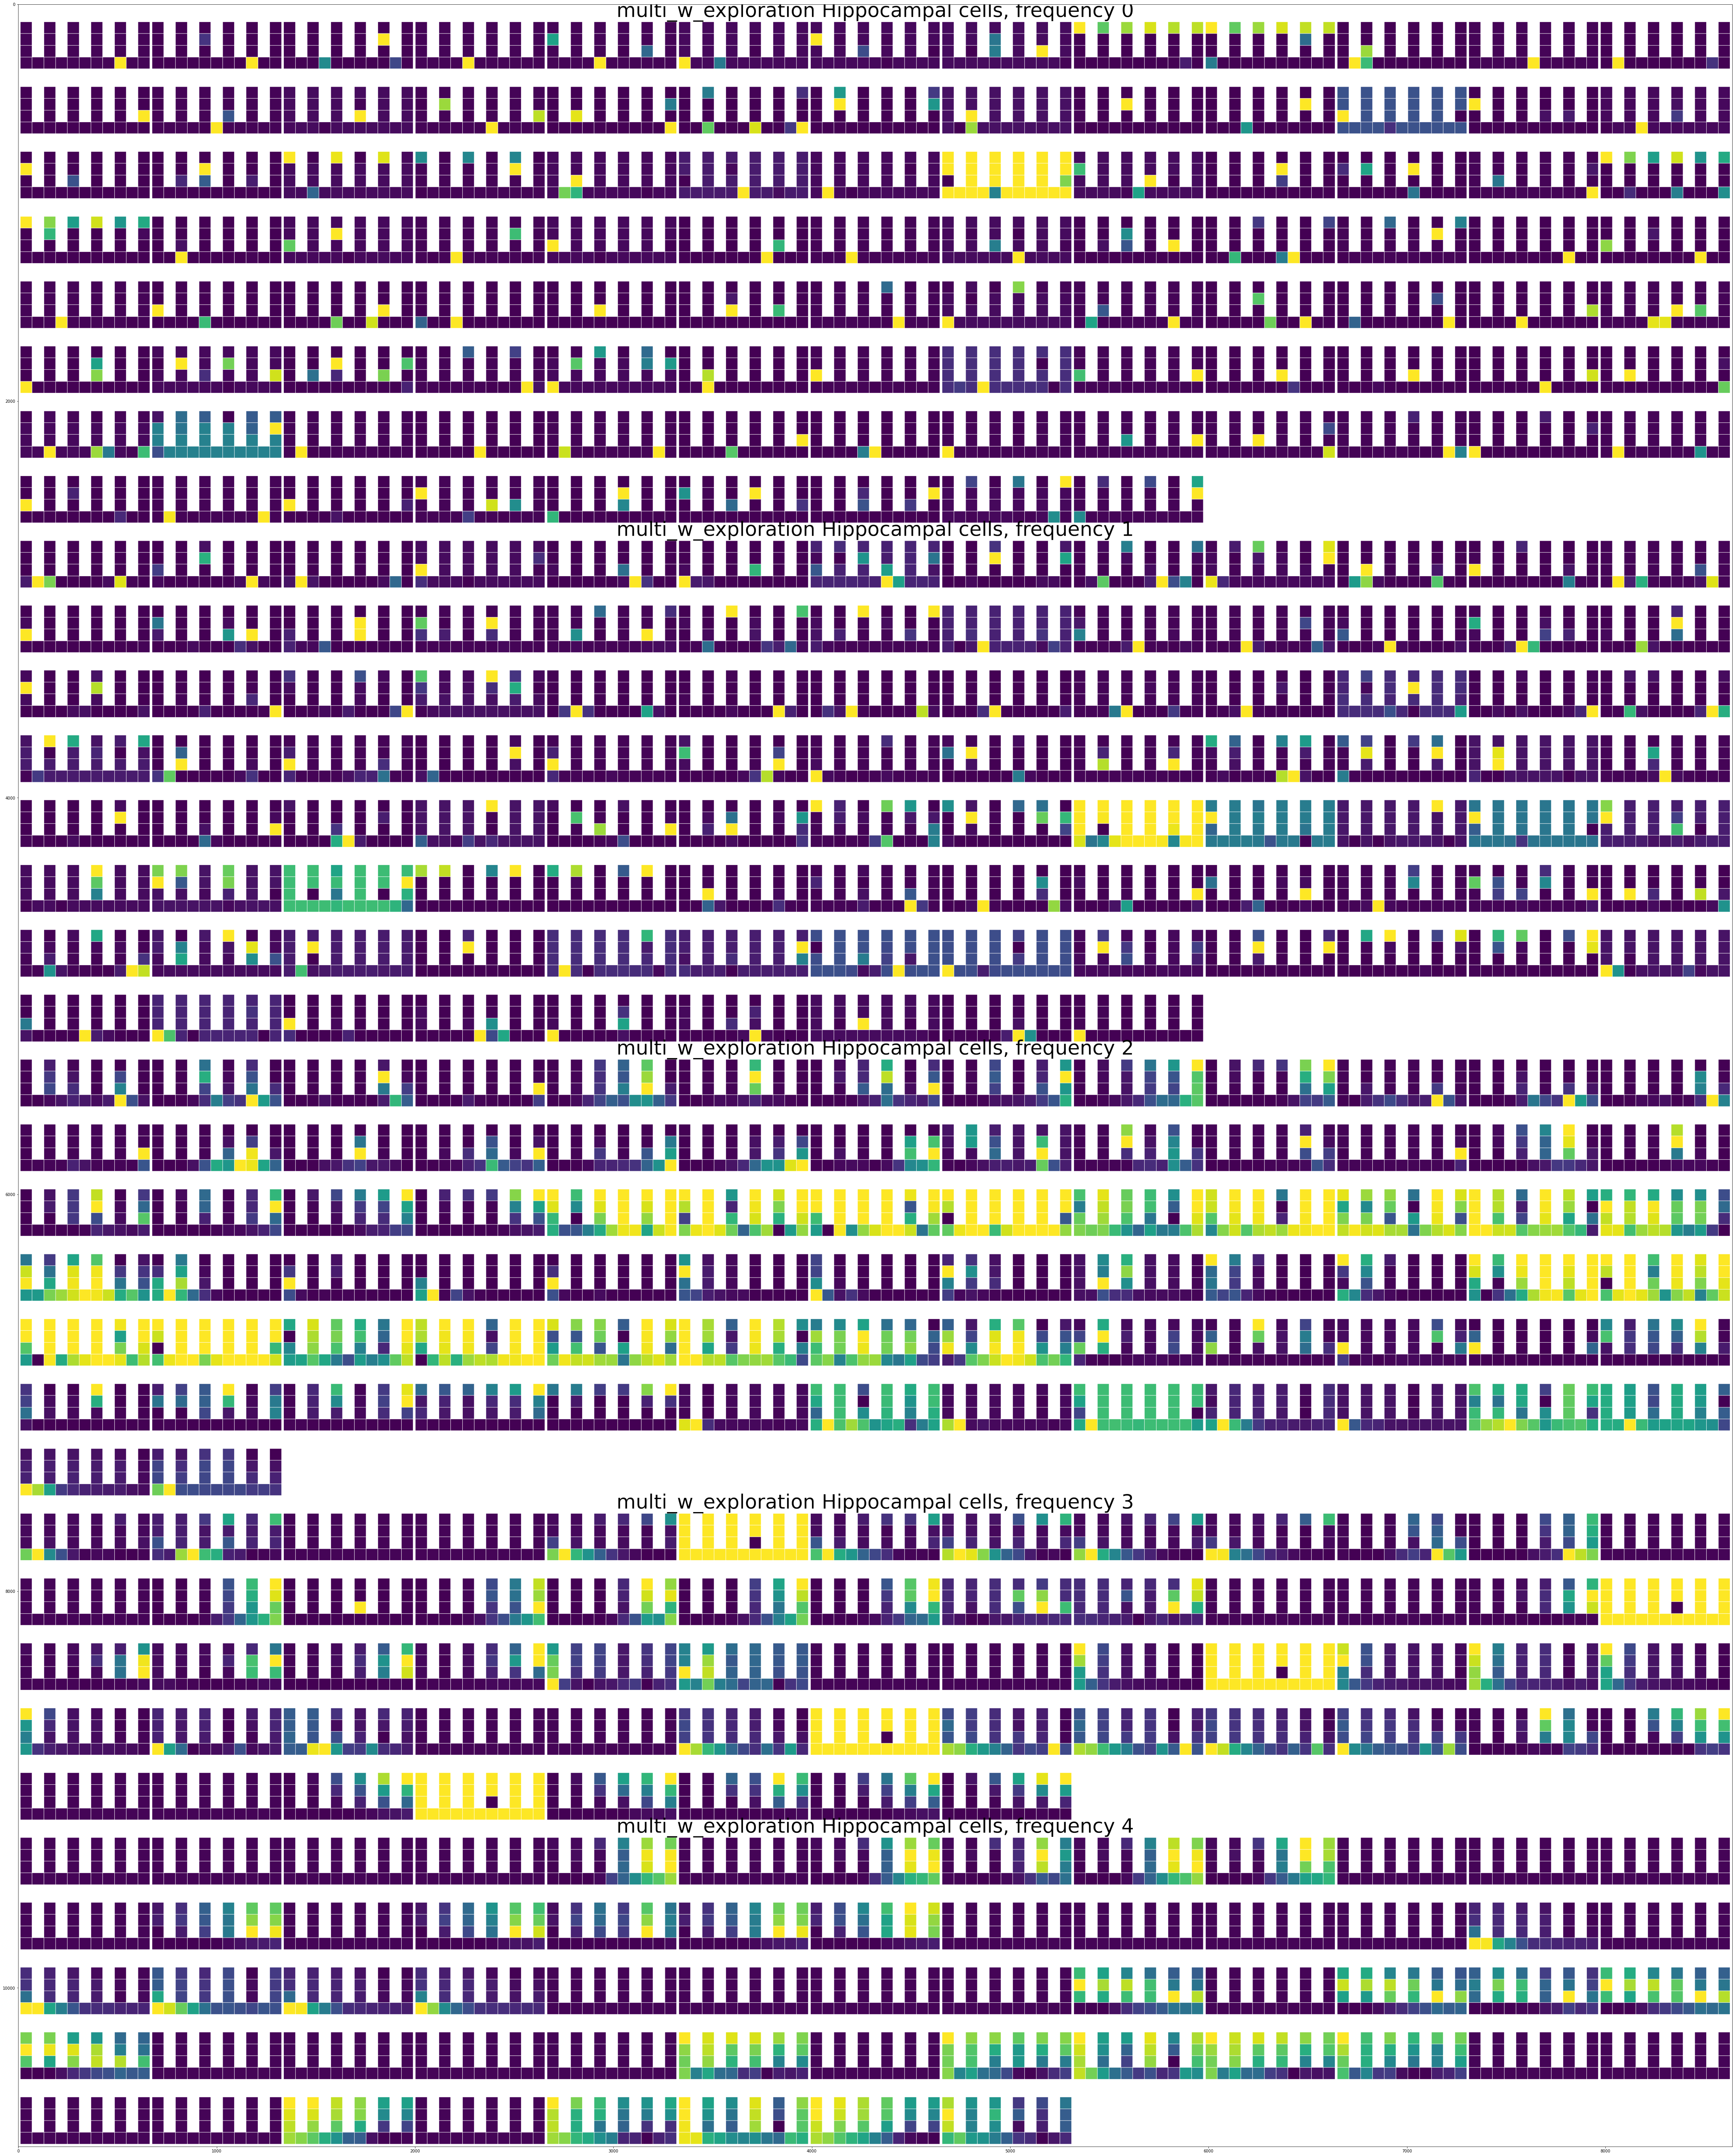

In [10]:
fig, ax = plt.subplots(figsize=(100, 100))

im = plt.imread(SAVE_DIR + 'index_{0}_seed_0_Hippocampal_cells.png'.format(IDX2))

ax.imshow(im)

In [ ]:
FREQUENCY = 0
plot.plot_single_frequency_all_cells_all_trajectories(all_p_random[0], frequency=FREQUENCY, environment=environments[0])

In [ ]:
print('{0} behavior_type with seed {1}'.format(BEHAVIOR_TYPE2, BEHAVIOR_SEED2))

In [ ]:
FREQUENCY = 1
plot.plot_single_frequency_all_cells_all_trajectories(all_p_random[0], frequency=FREQUENCY, environment=environments[0])

In [ ]:
FREQUENCY = 2
plot.plot_single_frequency_all_cells_all_trajectories(all_p_random[0], frequency=FREQUENCY, environment=environments[0])

In [ ]:
FREQUENCY = 3
plot.plot_single_frequency_all_cells_all_trajectories(all_p_random[0], frequency=FREQUENCY, environment=environments[0])

In [ ]:
FREQUENCY = 4
plot.plot_single_frequency_all_cells_all_trajectories(all_p_random[0], frequency=FREQUENCY, environment=environments[0])

In [ ]:
trajectories = list(permutations(np.arange(6), r=2))

In [ ]:
trajectories

In [ ]:
def get_path(pred, start, goal):
    path = [goal]
    k = goal
    while pred[start, k] != -9999:
        path.append(pred[start, k])
        k = pred[start, k]
    return path[::-1]

In [ ]:
def get_trajectory_states(trajectory, environment):
    
    trajectory_dict = analyse.make_trajectory_dict()
    # Calculate graph properties for shortest path calculation between arms
    adjacency = np.array(environment.adjacency) 
    dists, pred = shortest_path(adjacency, directed=False, method='FW', return_predecessors=True)

    curr_arm_end_state = trajectory[0] * 5
    new_arm_end_state = trajectory[1] * 5
    # Using the adjacency matrix, create a trajectory using a shortest path traversal from end of curr_arm to end of new_arm
    #trajectory = self.get_path(pred, curr_arm_end_state, new_arm_end_state)[1:]
    #print(trajectory)
    
    return [environment.locations[state_id]['id'] for state_id in get_path(pred, curr_arm_end_state, new_arm_end_state)][1:]

In [ ]:
state_seq_a = np.array(get_trajectory_states((1, 0), envs[0]))
state_seq_b = np.array(get_trajectory_states((1, 2), envs[0]))
unambiguous_locs = state_seq_a != state_seq_b
print(state_seq_a)
print(state_seq_b)
print(state_seq_a[unambiguous_locs])
print(state_seq_b[unambiguous_locs])

In [ ]:
def linearize_trajectory(p_env, frequency, trajectory, cell_num, environment):

    trajectory_states = get_trajectory_states(trajectory, environment)
    trajectory_i = trajectory_dict[trajectory]
    
    linearized_rate = np.array(p_env[frequency][trajectory_i])[:, cell_num][trajectory_states]
    
    return linearized_rate

In [ ]:
def linearize_neighbor_trajectories(p_env, frequency, cell_num, environment):
    
    all_trajectories = analyse.make_trajectory_dict()
    neighbor_trajectories = [trajectory for trajectory in all_trajectories if abs(trajectory[0] - trajectory[1]) == 1]
    
    linearized_dict = {}
    
    for trajectory in neighbor_trajectories:
        linearized_dict[trajectory] = linearize_trajectory(p_env, frequency,  trajectory, cell_num, environment)
    
    return linearized_dict

In [ ]:
ld_sweep = linearize_neighbor_trajectories(all_p_sweep[0], 4, 36, environments[0])

In [ ]:
all_trajectories = analyse.make_trajectory_dict()
neighbor_trajectories = [trajectory for trajectory in all_trajectories if abs(trajectory[0] - trajectory[1]) == 1]


In [ ]:
all_p_sweep_nonnegative = analyse.make_all_p_nonnegative(all_p_sweep[0])
all_p_random_nonnegative = analyse.make_all_p_nonnegative(all_p_random[0])

In [ ]:
plot.plot_single_cell_all_trajectories(all_p_random[0], frequency=0, cell_num=44, environment=environments[0])

In [ ]:
# Make a list of all neighbor_trajectories

In [ ]:
all_trajectories = analyse.make_trajectory_dict()
neighbor_trajectories = [trajectory for trajectory in all_trajectories if abs(trajectory[0] - trajectory[1]) == 1]


In [ ]:
FREQUENCY = 0

fig, axs = plt.subplots(all_p_random[0][FREQUENCY][0][0].shape[0], 2, figsize=(20, 350))
for cell_num in np.arange(all_p_random[0][FREQUENCY][0][0].shape[0]):
    
    ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, cell_num, environments[0])    
    ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, cell_num, environments[0])

    for trajectory in neighbor_trajectories:
        
        axs[cell_num, 0].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 0].set_title('cell_num: {0}.{1}'.format(FREQUENCY, cell_num))
        axs[cell_num, 0].legend(bbox_to_anchor=(1, 1))
        
        axs[cell_num, 1].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 1].set_title('cell_num: {0}.{1}'.format(FREQUENCY, cell_num))
        axs[cell_num, 1].legend(bbox_to_anchor=(1, 1))

In [ ]:
FREQUENCY = 1

fig, axs = plt.subplots(all_p_random[0][FREQUENCY][0][0].shape[0], 2, figsize=(20, 350))
for cell_num in np.arange(all_p_random[0][FREQUENCY][0][0].shape[0]):
    
    ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, cell_num, environments[0])    
    ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, cell_num, environments[0])

    for trajectory in neighbor_trajectories:
        
        axs[cell_num, 0].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 0].set_title('cell_num: {0}.{1}'.format(FREQUENCY, cell_num))
        axs[cell_num, 0].legend(bbox_to_anchor=(1, 1))
        
        axs[cell_num, 1].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 1].set_title('cell_num: {0}.{1}'.format(FREQUENCY, cell_num))
        axs[cell_num, 1].legend(bbox_to_anchor=(1, 1))

In [ ]:
FREQUENCY = 2

fig, axs = plt.subplots(all_p_random[0][FREQUENCY][0][0].shape[0], 2, figsize=(20, 350))
for cell_num in np.arange(all_p_random[0][FREQUENCY][0][0].shape[0]):
    
    ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, cell_num, environments[0])    
    ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, cell_num, environments[0])

    for trajectory in neighbor_trajectories:
        
        axs[cell_num, 0].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 0].set_title('cell_num: {0}.{1}'.format(FREQUENCY, cell_num))
        axs[cell_num, 0].legend(bbox_to_anchor=(1, 1))
        
        axs[cell_num, 1].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 1].set_title('cell_num: {0}.{1}'.format(FREQUENCY, cell_num))
        axs[cell_num, 1].legend(bbox_to_anchor=(1, 1))

In [ ]:
FREQUENCY = 3

fig, axs = plt.subplots(all_p_random[0][FREQUENCY][0][0].shape[0], 2, figsize=(20, 350))
for cell_num in np.arange(all_p_random[0][FREQUENCY][0][0].shape[0]):
    
    ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, cell_num, environments[0])    
    ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, cell_num, environments[0])

    for trajectory in neighbor_trajectories:
        
        axs[cell_num, 0].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 0].set_title('cell_num: {0}.{1}'.format(FREQUENCY, cell_num))
        axs[cell_num, 0].legend(bbox_to_anchor=(1, 1))
        
        axs[cell_num, 1].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 1].set_title('cell_num: {0}.{1}'.format(FREQUENCY, cell_num))
        axs[cell_num, 1].legend(bbox_to_anchor=(1, 1))

In [ ]:
FREQUENCY = 4

fig, axs = plt.subplots(all_p_random[0][FREQUENCY][0][0].shape[0], 2, figsize=(20, 350))
for cell_num in np.arange(all_p_random[0][FREQUENCY][0][0].shape[0]):
    
    ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, cell_num, environments[0])    
    ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, cell_num, environments[0])

    for trajectory in neighbor_trajectories:
        
        axs[cell_num, 0].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 0].set_title('cell_num: {0}.{1}'.format(FREQUENCY, cell_num))
        axs[cell_num, 0].legend(bbox_to_anchor=(1, 1))
        #axs[cell_num, 0].set_ylim(0, 1)
        
        axs[cell_num, 1].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 1].set_title('cell_num: {0}.{1}'.format(FREQUENCY, cell_num))
        axs[cell_num, 1].legend(bbox_to_anchor=(1, 1))
        #axs[cell_num, 1].set_ylim(0, 1)

In [ ]:
## FREQUENCY == 0 flat curves

In [ ]:
sweep_flat_val_list = []
random_flat_val_list = []

FREQUENCY = 0

for cell_num in np.arange(all_p_random[0][FREQUENCY][0][0].shape[0]):
    
    ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, cell_num, environments[0])    
    ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, cell_num, environments[0])
    #print('{0}.{1}'.format(FREQUENCY, cell_num))
    for trajectory in neighbor_trajectories:
        if np.var(ld_sweep_i[trajectory]) == 0:
            sweep_flat_val_list.append(ld_sweep_i[trajectory][0])
        if np.var(ld_random_i[trajectory]) == 0:
            random_flat_val_list.append(ld_random_i[trajectory][0])
        #print('{0}: {1}\n'.format((trajectory[0]+1, trajectory[1]+1), ld_sweep_i[trajectory]))
                                        

In [ ]:
print(np.all(np.array(sweep_flat_val_list) == 0))
print(np.all(np.array(random_flat_val_list) == 0))

In [ ]:
FREQUENCY = 0

fig, axs = plt.subplots(all_p_random_nonnegative[FREQUENCY][0][0].shape[0], 2, figsize=(20, 350))
for cell_num in np.arange(all_p_random_nonnegative[FREQUENCY][0][0].shape[0]):
    
    ld_sweep_nonnegative_i = linearize_neighbor_trajectories(all_p_sweep_nonnegative, FREQUENCY, cell_num, environments[0])    
    ld_random_nonnegative_i = linearize_neighbor_trajectories(all_p_random_nonnegative, FREQUENCY, cell_num, environments[0])

    for trajectory_i, trajectory in enumerate(neighbor_trajectories):
        
        linestyle = 'solid'# if trajectory_i % 2 else 'dashed'
        axs[cell_num, 0].plot(ld_sweep_nonnegative_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)), linestyle=linestyle)#, color=cm.jet(trajectory_i/(len(neighbor_trajectories)/2)))
        axs[cell_num, 0].set_title('cell_num: {0}.{1}'.format(FREQUENCY, cell_num))
        axs[cell_num, 0].legend(bbox_to_anchor=(1, 1))
        axs[cell_num, 0].set_ylim(0, 1)
        
        axs[cell_num, 1].plot(ld_random_nonnegative_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)), linestyle=linestyle)#, color=cm.jet(trajectory_i/(len(neighbor_trajectories)/2)))
        axs[cell_num, 1].set_title('cell_num: {0}.{1}'.format(FREQUENCY, cell_num))
        axs[cell_num, 1].legend(bbox_to_anchor=(1, 1))
        axs[cell_num, 1].set_ylim(0, 1)

In [ ]:
FREQUENCY = 1

fig, axs = plt.subplots(all_p_random_nonnegative[FREQUENCY][0][0].shape[0], 2, figsize=(20, 350))
for cell_num in np.arange(all_p_random_nonnegative[FREQUENCY][0][0].shape[0]):
    
    ld_sweep_nonnegative_i = linearize_neighbor_trajectories(all_p_sweep_nonnegative, FREQUENCY, cell_num, environments[0])    
    ld_random_nonnegative_i = linearize_neighbor_trajectories(all_p_random_nonnegative, FREQUENCY, cell_num, environments[0])

    for trajectory_i, trajectory in enumerate(neighbor_trajectories):
        
        linestyle = 'solid'# if trajectory_i % 2 else 'dashed'
        axs[cell_num, 0].plot(ld_sweep_nonnegative_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)), linestyle=linestyle)
        axs[cell_num, 0].set_title('cell_num: {0}.{1}'.format(FREQUENCY, cell_num))
        axs[cell_num, 0].legend(bbox_to_anchor=(1, 1))
        axs[cell_num, 0].set_ylim(0, 1)
        
        axs[cell_num, 1].plot(ld_random_nonnegative_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)), linestyle=linestyle)
        axs[cell_num, 1].set_title('cell_num: {0}.{1}'.format(FREQUENCY, cell_num))
        axs[cell_num, 1].legend(bbox_to_anchor=(1, 1))
        axs[cell_num, 1].set_ylim(0, 1)

In [ ]:
FREQUENCY = 2

fig, axs = plt.subplots(all_p_random_nonnegative[FREQUENCY][0][0].shape[0], 2, figsize=(20, 350))
for cell_num in np.arange(all_p_random_nonnegative[FREQUENCY][0][0].shape[0]):
    
    ld_sweep_nonnegative_i = linearize_neighbor_trajectories(all_p_sweep_nonnegative, FREQUENCY, cell_num, environments[0])    
    ld_random_nonnegative_i = linearize_neighbor_trajectories(all_p_random_nonnegative, FREQUENCY, cell_num, environments[0])

    for trajectory in neighbor_trajectories:
        
        axs[cell_num, 0].plot(ld_sweep_nonnegative_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 0].set_title('cell_num: {0}.{1}'.format(FREQUENCY, cell_num))
        axs[cell_num, 0].legend(bbox_to_anchor=(1, 1))
        axs[cell_num, 0].set_ylim(0, 1)
        
        axs[cell_num, 1].plot(ld_random_nonnegative_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 1].set_title('cell_num: {0}.{1}'.format(FREQUENCY, cell_num))
        axs[cell_num, 1].legend(bbox_to_anchor=(1, 1))
        axs[cell_num, 1].set_ylim(0, 1)

In [ ]:
FREQUENCY = 3

fig, axs = plt.subplots(all_p_random_nonnegative[FREQUENCY][0][0].shape[0], 2, figsize=(20, 350))
for cell_num in np.arange(all_p_random_nonnegative[FREQUENCY][0][0].shape[0]):
    
    ld_sweep_nonnegative_i = linearize_neighbor_trajectories(all_p_sweep_nonnegative, FREQUENCY, cell_num, environments[0])    
    ld_random_nonnegative_i = linearize_neighbor_trajectories(all_p_random_nonnegative, FREQUENCY, cell_num, environments[0])

    for trajectory in neighbor_trajectories:
        
        axs[cell_num, 0].plot(ld_sweep_nonnegative_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 0].set_title('cell_num: {0}.{1}'.format(FREQUENCY, cell_num))
        axs[cell_num, 0].legend(bbox_to_anchor=(1, 1))
        axs[cell_num, 0].set_ylim(0, 1)
        
        axs[cell_num, 1].plot(ld_random_nonnegative_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 1].set_title('cell_num: {0}.{1}'.format(FREQUENCY, cell_num))
        axs[cell_num, 1].legend(bbox_to_anchor=(1, 1))
        axs[cell_num, 1].set_ylim(0, 1)

In [ ]:
FREQUENCY = 4

fig, axs = plt.subplots(all_p_random_nonnegative[FREQUENCY][0][0].shape[0], 2, figsize=(20, 350))
for cell_num in np.arange(all_p_random_nonnegative[FREQUENCY][0][0].shape[0]):
    
    ld_sweep_nonnegative_i = linearize_neighbor_trajectories(all_p_sweep_nonnegative, FREQUENCY, cell_num, environments[0])    
    ld_random_nonnegative_i = linearize_neighbor_trajectories(all_p_random_nonnegative, FREQUENCY, cell_num, environments[0])

    for trajectory in neighbor_trajectories:
        
        axs[cell_num, 0].plot(ld_sweep_nonnegative_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 0].set_title('cell_num: {0}.{1}'.format(FREQUENCY, cell_num))
        axs[cell_num, 0].legend(bbox_to_anchor=(1, 1))
        axs[cell_num, 0].set_ylim(0, 1)
        
        axs[cell_num, 1].plot(ld_random_nonnegative_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 1].set_title('cell_num: {0}.{1}'.format(FREQUENCY, cell_num))
        axs[cell_num, 1].legend(bbox_to_anchor=(1, 1))
        axs[cell_num, 1].set_ylim(0, 1)

In [ ]:
def normalized_overlap(trajectory_a, trajectory_b):
    
    overlap = np.sum(np.min(np.vstack([trajectory_a, trajectory_b]), axis=0))
    area_a, area_b = np.sum(trajectory_a), np.sum(trajectory_b)
    
    return np.divide(2*overlap, (area_a+area_b))

In [ ]:
rng = np.random.default_rng()

trajectory_a, trajectory_b = rng.integers(10, size=10), rng.integers(10, size=10)
trajectory_c = trajectory_a
overlap = np.min(np.vstack([trajectory_a, trajectory_b]), axis=0)

fig, ax = plt.subplots()

ax.plot(trajectory_a)
ax.plot(trajectory_b)
ax.scatter(np.arange(overlap.shape[0]), overlap, color='tab:green')

print(normalized_overlap(trajectory_a, trajectory_c))

In [ ]:
#print(type(all_p_random), len(all_p_random))
print(type(all_p_random[0]), len(all_p_random[0]))
print(type(all_p_random[0][0]), len(all_p_random[0][0]))
print(type(all_p_random[0][0][0]), len(all_p_random[0][0][0]))
print(type(all_p_random[0][0][0][0]), len(all_p_random[0][0][0][0]))

In [ ]:
def make_all_p_nonnegative(p_env):
    all_p_nonnegative = deepcopy(p_env)
    for frequency in range(len(p_env)):
        for trajectory in range(len(p_env[frequency])):
            for cell_num in range(len(p_env[frequency][trajectory][0])):
                traj_by_loc_by_cell = np.array(p_env[frequency])
                all_traj_min = np.min(traj_by_loc_by_cell[:, :, cell_num][traj_by_loc_by_cell[:, :, cell_num] != -999])
                all_traj_max = np.max(traj_by_loc_by_cell[:, :, cell_num][traj_by_loc_by_cell[:, :, cell_num] != -999] - all_traj_min)
                if all_traj_min != 0 and all_traj_max != 0:
                    trajectory_loc_by_cell = all_p_nonnegative[frequency][trajectory][:, cell_num]
                    # Shift and scale all non -999 values
                    trajectory_loc_by_cell[trajectory_loc_by_cell != -999] = trajectory_loc_by_cell[trajectory_loc_by_cell != -999] - all_traj_min
                    trajectory_loc_by_cell[trajectory_loc_by_cell != -999] = trajectory_loc_by_cell[trajectory_loc_by_cell != -999] / all_traj_max
                    all_p_nonnegative[frequency][trajectory][:, cell_num] = trajectory_loc_by_cell
                    #print(trajectory)
    return all_p_nonnegative

In [ ]:
print(len(all_p_sweep_nonnegative[0]))
print(len(all_p_sweep_nonnegative[0][0]))
print(len(all_p_sweep_nonnegative[0][0][0]))

In [ ]:
fig, ax = plt.subplots(all_p_sweep_nonnegative[4][0][0].shape[0], figsize=(8, 250))
for cell_num in np.arange(all_p_sweep_nonnegative[4][0][0].shape[0]):
    
    ld_sweep_nonnegative_i = linearize_neighbor_trajectories(all_p_sweep_nonnegative, 4, cell_num, environments[0])

    for trajectory in neighbor_trajectories:

        ax[cell_num].plot(ld_sweep_nonnegative_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        ax[cell_num].set_title('cell_num: {0}'.format(cell_num))
        
        ax[cell_num].legend()

In [ ]:
def is_neighbor_trajectory(trajectory):
    return True if abs(trajectory[0] - trajectory[1]) == 1 else False

In [ ]:
def is_neighbor_pair(trajectory_pair):
    trajectory_a = trajectory_pair[0]
    trajectory_b = trajectory_pair[1]
    return is_neighbor_trajectory(trajectory_a) and is_neighbor_trajectory(trajectory_b)

In [ ]:
def make_neighbor_trajectory_dict(trajectory_dict):
    neighbor_trajectory_idx = 0
    neighbor_trajectory_dict = {}
    for trajectory in trajectory_dict:
        if is_neighbor_trajectory(trajectory):
            neighbor_trajectory_dict[trajectory] = neighbor_trajectory_idx
            neighbor_trajectory_idx = neighbor_trajectory_idx + 1
    return neighbor_trajectory_dict

In [ ]:
#[trajectory for trajectory in trajectory_dict.keys() if abs(trajectory[0] - trajectory[1]) == 1]

In [ ]:
def get_sim_mat(p_env_nonnegative, frequency, cell_num, environment, cell_i=-1, zero_trajectory_threshold=0):
    
    normalized_overlap_dict = {}
    trajectory_dict = analyse.make_trajectory_dict()
    neighbor_trajectory_dict = make_neighbor_trajectory_dict(trajectory_dict)
    
    cell_ld = linearize_neighbor_trajectories(p_env_nonnegative, frequency, cell_num, environment)
    trace_peak_sum_list = []
    for trajectory_a in trajectory_dict.keys():
        for trajectory_b in trajectory_dict.keys():
            if abs(trajectory_a[0] - trajectory_a[1]) == 1 and abs(trajectory_b[0] - trajectory_b[1]) == 1 and trajectory_a != trajectory_b:
                trace_a = cell_ld[trajectory_a]
                trace_b = cell_ld[trajectory_b]
                trace_peak_sum_list.append(np.max(trace_a) + np.max(trace_b))
                #print(trace_a)
                normalized_overlap_dict[(trajectory_a, trajectory_b)] = analyse.normalized_overlap_path_equivalence(trajectory_a, trajectory_b, trace_a, trace_b, environment, zero_trajectory_threshold)

    sim_mat = np.zeros((10, 10))

    for pair in normalized_overlap_dict.keys():
        trajectory_a = pair[0]
        trajectory_b = pair[1]
        row = neighbor_trajectory_dict[trajectory_a]
        col = neighbor_trajectory_dict[trajectory_b]
        sim_mat[row, col] = normalized_overlap_dict[pair]

    np.fill_diagonal(sim_mat, 0)
    
    return sim_mat
    

In [ ]:
def get_path_equivalence_vector(all_p_env, frequency, cell_num, environment):
    
    

In [ ]:
np.sign([1, -1])

In [ ]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

In [ ]:
reload(analyse)

In [ ]:
ZERO_TRAJECTORY_THRESHOLD = 0

In [ ]:
FREQUENCY = 0

fig, axs = plt.subplots(all_p_sweep[0][FREQUENCY][0][0].shape[0], 2, figsize=(30, 700))

for cell_num in np.arange(all_p_sweep[0][FREQUENCY][0][0].shape[0]):
    
    sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
    axs[cell_num, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
    
    ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, cell_num, environments[0])    

    for trajectory in neighbor_trajectories:
        
        axs[cell_num, 1].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 1].set_title('cell_num: {0}.{1}; (min, max): {2}'.format(FREQUENCY, cell_num, min_max))
        axs[cell_num, 1].legend(bbox_to_anchor=(1, 1))

In [ ]:
FREQUENCY = 1

fig, axs = plt.subplots(all_p_sweep[0][FREQUENCY][0][0].shape[0], 2, figsize=(30, 700))

for cell_num in np.arange(all_p_sweep[0][FREQUENCY][0][0].shape[0]):
          
    sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
    axs[cell_num, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
    
    ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, cell_num, environments[0])    

    for trajectory in neighbor_trajectories:
        
        axs[cell_num, 1].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 1].set_title('cell_num: {0}.{1}; (min, max): {2}'.format(FREQUENCY, cell_num, min_max))
        axs[cell_num, 1].legend(bbox_to_anchor=(1, 1))

In [ ]:
FREQUENCY = 2

fig, axs = plt.subplots(all_p_sweep[0][FREQUENCY][0][0].shape[0], 2, figsize=(30, 700))

for cell_num in np.arange(all_p_sweep[0][FREQUENCY][0][0].shape[0]):
          
    sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
    axs[cell_num, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
    
    ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, cell_num, environments[0])    

    for trajectory in neighbor_trajectories:
        
        axs[cell_num, 1].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 1].set_title('cell_num: {0}.{1}; (min, max): {2}'.format(FREQUENCY, cell_num, min_max))
        axs[cell_num, 1].legend(bbox_to_anchor=(1, 1))

In [ ]:
FREQUENCY = 3

fig, axs = plt.subplots(all_p_sweep[0][FREQUENCY][0][0].shape[0], 2, figsize=(30, 700))

for cell_num in np.arange(all_p_sweep[0][FREQUENCY][0][0].shape[0]):
          
    sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
    axs[cell_num, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
    
    ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, cell_num, environments[0])    

    for trajectory in neighbor_trajectories:
        
        axs[cell_num, 1].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 1].set_title('cell_num: {0}.{1}; (min, max): {2}'.format(FREQUENCY, cell_num, min_max))
        axs[cell_num, 1].legend(bbox_to_anchor=(1, 1))

In [ ]:
FREQUENCY = 4

fig, axs = plt.subplots(all_p_sweep[0][FREQUENCY][0][0].shape[0], 2, figsize=(30, 700))

for cell_num in np.arange(all_p_sweep[0][FREQUENCY][0][0].shape[0]):
          
    sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
    axs[cell_num, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
    
    ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, cell_num, environments[0])    

    for trajectory in neighbor_trajectories:
        
        axs[cell_num, 1].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_num, 1].set_title('cell_num: {0}.{1}; (min, max): {2}'.format(FREQUENCY, cell_num, min_max))
        axs[cell_num, 1].legend(bbox_to_anchor=(1, 1))

In [ ]:
trajectory_dict = analyse.make_trajectory_dict()
trajectory_dict

In [ ]:
def find_col(value, sim_mat):
    
    col = np.argwhere(sim_mat == value)[:, 0][0]
    
    return col

def update_available_points(ordered_list, prev_points, available_points, sim_mat):
    # Take only the below-diagonal points
    all_points = set([point for point in list(permutations(np.arange(10), r=2))])
    if len(ordered_list) == 1:
        prev_col = prev_points[-1][0]
        available_points = [point for point in all_points if point[1] == prev_col]
        #print('first')
    else:
        prev_col = prev_points[-1][0]
        # Get all points in new column
        new_available_points = [point for point in all_points if point[1] == prev_col]
        new_available_points = set([point if (point[0] > point[1]) else point[::-1] for point in all_points])
        # Add the new points to the previous points
        available_points = set(available_points) | new_available_points
        
        #print('second')
    # remove any points that have already been seen
    available_points = [point for point in available_points if not (point in prev_points)]
    #print(available_points)
    return available_points

def order_vector_preserve_location(sim_mat):
    
    sim_mat_mask = make_sim_mat_mask()
    ordered_list = []
    prev_points = []
    for trajectory_pair_tier in [0, 1, 2, 3]:
        # only consider lower triangle
        available_points = [point for point in list(permutations(np.arange(10), r=2)) if point[0] > point[1]]
        available_points = [point for point in available_points if sim_mat_mask[point] == trajectory_pair_tier]
        column_list = []
        # Assume no ties for now
        for i in np.arange(sim_mat[sim_mat_mask == trajectory_pair_tier].shape[0] / 2):
            # Find the initial maximum value
            available_sim_mat = np.array([sim_mat[point] for point in available_points])
            #print(trajectory_pair_tier, available_sim_mat)
            new_max = np.max(available_sim_mat)
            # Get the point that leads to max point
            new_max_point = [point for point in available_points if sim_mat[point] == new_max][0]
            # Find the column where that value came from
            new_max_col = new_max_point[0]
            # Add the column of this value to the list of columns we can look through
            column_list.append(new_max_col)
            # Add the max value to our overall sorted list
            ordered_list.append(new_max)
            prev_points.append(new_max_point)
            available_points = update_available_points(ordered_list, prev_points, available_points, sim_mat)
            
    return ordered_list


In [ ]:
def new_order(similarity_matrix):
    similarity_matrix_copy = np.copy(similarity_matrix)
    np.fill_diagonal(similarity_matrix_copy, np.min(similarity_matrix_copy - 1))
    available_columns = []
    already_collected_values = []
    first_max = np.max(similarity_matrix_copy)
    # This is the one in the upper triangle
    first_max_idx = np.argwhere(similarity_matrix_copy == first_max)[0]
    # Add first max value
    already_collected_values.append(first_max)
    # Append both the row and column to available_columns - the column for obvious reasons and the row because this is the column of the other place this value appears.
    available_columns.append(first_max_idx[0])
    available_columns.append(first_max_idx[1])
    # Now go through the rest of the values and repeat this process
    for _ in np.arange((((similarity_matrix.shape[0] * similarity_matrix_copy.shape[1]) - similarity_matrix_copy.shape[0]) / 2) - 1):
        available_matrix = similarity_matrix_copy[:, available_columns]
        available_matrix_not_collected_values = available_matrix[~np.isin(available_matrix, already_collected_values)]
        
        next_max = np.max(available_matrix_not_collected_values)
        # Add new max value
        already_collected_values.append(next_max)
        next_max_idx = np.argwhere(similarity_matrix_copy == next_max)[0]
        # Add idxs to available columns
        available_columns.append(next_max_idx[0])
        available_columns.append(next_max_idx[1])

    return already_collected_values

In [ ]:
def decreasing_order_remove_ambiguous_comparisons(sim_mat):
    triu = sim_mat[np.triu_indices_from(sim_mat, k=1)]
    remove_ambiguous = triu[np.hstack([np.arange(2), np.arange(3, 9), np.arange(10, 19), np.arange(20, 24), np.arange(25, 32), np.arange(33, 35), np.arange(36, 41), np.arange(43, 45)])]
    return np.sort(remove_ambiguous)[::-1]

In [ ]:
def decreasing_order(sim_mat):
    triu = sim_mat[np.triu_indices_from(sim_mat, k=1)]
    return np.sort(triu)[::-1]

In [ ]:
fig, axs = plt.subplots(400, 2)

sweep_cell_mat_list = []

for frequency in np.arange(5):
    for cell_num in np.arange(all_p_sweep[0][frequency][0][0].shape[0]):
        sweep_cell_mat_list.append(plot_sim_mat(all_p_sweep[0], fig, axs, frequency=frequency, cell_num=cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[1])

random_cell_mat_list = []

for frequency in np.arange(5):
    for cell_num in np.arange(all_p_random[0][frequency][0][0].shape[0]):
        random_cell_mat_list.append(plot_sim_mat(all_p_random[0], fig, axs, frequency=frequency, cell_num=cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)[1])



In [ ]:
sweep_cell_vec_list = []

for cell_mat in sweep_cell_mat_list:
    sweep_cell_vec_list.append(decreasing_order(cell_mat))
    
random_cell_vec_list = []

for cell_mat in random_cell_mat_list:
    random_cell_vec_list.append(decreasing_order(cell_mat))   

In [ ]:
sweep_cell_vec_list[0]

In [ ]:
random_cell_vec_list[0]

In [ ]:
sweep_cell_stack = sweep_cell_vec_list[0]
for cell in sweep_cell_vec_list[1:]:
    sweep_cell_stack = np.vstack([sweep_cell_stack, cell])

random_cell_stack = random_cell_vec_list[0]
for cell in random_cell_vec_list[1:]:
    random_cell_stack = np.vstack([random_cell_stack, cell])

print(sweep_cell_stack.shape)
print(random_cell_stack.shape)

In [ ]:
sweep_cell_stack

In [ ]:
random_cell_stack

In [ ]:
both_policies = np.vstack([sweep_cell_stack, random_cell_stack])

In [ ]:
center_both_policies = both_policies - np.mean(both_policies, axis=0)

In [ ]:
print(center_both_policies.shape)

In [ ]:
U, Sigma, V_T = np.linalg.svd(center_both_policies, full_matrices=True)

In [ ]:
print(U.shape)
print(Sigma.shape)
print(V_T.shape)

In [ ]:
eigs = Sigma**2
eigs_frac = eigs / np.sum(eigs)

In [ ]:
fig, ax = plt.subplots()

ax.bar(np.arange(eigs_frac[:10].shape[0]) + 1, eigs_frac[:10])
ax.set_ylim(0, 1)
ax.set_xlim(0, 11)
xticks = ax.set_xticks(np.arange(0, 11))

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(V_T.T[:, 0])
ax.plot(V_T.T[:, 1])
x_ticks = ax.set_xticks(np.arange(45))

In [ ]:
# Separate the vectors from the sweeping and random policies
centered_sweep_vecs = center_both_policies[:400, :]
centered_random_vecs = center_both_policies[400:, :]

# Project onto principal directions
projected_sweep_vecs = centered_sweep_vecs @ V_T.T
projected_random_vecs = centered_random_vecs @ V_T.T

# First two principal components
projected_sweep_two = projected_sweep_vecs[:, :2]
projected_random_two = projected_random_vecs[:, :2]
print(projected_sweep_two.shape)
print(projected_random_two.shape)

In [ ]:
S = np.zeros((800, 45))
S[:45, :45] = np.diag(Sigma)
S

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(projected_sweep_two[:, 0], projected_sweep_two[:, 1], label='projected_sweep', s=120, alpha=0.8)
ax.scatter(projected_random_two[:, 0], projected_random_two[:, 1], label='projected_random', s=120, alpha=0.8)

sweep_centroid = np.mean(projected_sweep_two, axis=0)
random_centroid = np.mean(projected_random_two, axis=0)
ax.scatter(sweep_centroid[0], sweep_centroid[1], s=200, label='sweep_centroid')
ax.scatter(random_centroid[0], random_centroid[1], s=200, label='random_centroid')
#ax.axvline(1)
#ax.axhline(-0.3)
ax.legend()

In [ ]:
decreasing_total_variance = np.var(np.vstack([projected_sweep_two[:, 0], projected_random_two[:, 0]])) / eigs_frac[0]
decreasing_total_variance

In [ ]:
np.var(np.vstack([projected_sweep_two[:, 0], projected_random_two[:, 0]]))

In [ ]:
import seaborn as sns
sns.distplot(projected_sweep_two[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_two[:, 0], projected_random_two[:, 0]])), np.max(np.hstack([projected_sweep_two[:, 0], projected_random_two[:, 0]])), 20))
sns.distplot(projected_random_two[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_two[:, 0], projected_random_two[:, 0]])), np.max(np.hstack([projected_sweep_two[:, 0], projected_random_two[:, 0]])), 20))

In [ ]:
sns.distplot(projected_sweep_two[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_two[:, 1], projected_random_two[:, 1]])), np.max(np.hstack([projected_sweep_two[:, 1], projected_random_two[:, 1]])), 20))
sns.distplot(projected_random_two[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_two[:, 1], projected_random_two[:, 1]])), np.max(np.hstack([projected_sweep_two[:, 1], projected_random_two[:, 1]])), 20))

In [ ]:
fig, axs = plt.subplots(2, figsize=(15, 10))
sweep_hist = axs[0].hist(projected_sweep_two[:, 0], bins=np.linspace(np.min(projected_sweep_two[:, 0]), np.max(projected_sweep_two[:, 0]), 16), label='projected_sweep', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:blue')
random_arm_hist = axs[0].hist(projected_random_two[:, 0], bins=np.linspace(np.min(projected_sweep_two[:, 0]), np.max(projected_sweep_two[:, 0]), 16), label='projected_random', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:orange')
axs[0].set_xlim(np.min(projected_sweep_two[:, 0]), np.max(projected_sweep_two[:, 0]))
axs[0].set_title('PC 1')

sweep_hist = axs[1].hist(projected_sweep_two[:, 1], bins=np.linspace(np.min(projected_sweep_two[:, 1]), np.max(projected_sweep_two[:, 1]), 16), label='projected_sweep', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:blue')
random_arm_hist = axs[1].hist(projected_random_two[:, 1], bins=np.linspace(np.min(projected_sweep_two[:, 1]), np.max(projected_sweep_two[:, 1]), 16), label='projected_random', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:orange')
axs[1].set_xlim(np.min(projected_sweep_two[:, 1]), np.max(projected_sweep_two[:, 1]))
axs[1].set_title('PC 2')


In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.hist(projected_sweep_two[:, 0], bins=np.linspace(np.min(projected_sweep_two[:, 0]), np.max(projected_sweep_two[:, 0]), 1000), label='projected_sweep', histtype='step', cumulative=True, density=True, color='tab:blue')
ax.hist(projected_random_two[:, 0], bins=np.linspace(np.min(projected_sweep_two[:, 0]), np.max(projected_sweep_two[:, 0]), 1000), label='projected_random', histtype='step', cumulative=True, density=True, color='tab:orange')
#ax.set_xticks(np.linspace(np.min(projected_sweep_two), np.max(projected_sweep_two),  21))
ax.set_xlim(np.min(projected_sweep_two[:, 0]), np.max(projected_sweep_two[:, 0]))
sweep_mean = np.mean(projected_sweep_two[:, 0])#, axis=0)
random_mean = np.mean(projected_random_two[:, 0])#, axis=0)
#ax.axvline(sweep_mean, label='sweep_mean', color='tab:blue')
#ax.axvline(random_mean, label='random_mean', color='tab:orange')
#ax.axvline(0.22)
#ax.axvline(0.26)
ax.set_title('PC1')
#ax.axhline(0.85)
#ax.axhline(0.92)
ax.legend(bbox_to_anchor=(1, 1.1))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.hist(projected_sweep_two[:, 1], bins=np.linspace(np.min(projected_sweep_two[:, 1]), np.max(projected_sweep_two[:, 1]), 1000), label='projected_sweep', histtype='step', cumulative=True, density=True, color='tab:blue')
ax.hist(projected_random_two[:, 1], bins=np.linspace(np.min(projected_sweep_two[:, 1]), np.max(projected_sweep_two[:, 1]), 1000), label='projected_random', histtype='step', cumulative=True, density=True, color='tab:orange')
#ax.set_xticks(np.linspace(np.min(projected_sweep_two), np.max(projected_sweep_two),  21))
ax.set_xlim(np.min(projected_sweep_two[:, 1]), np.max(projected_sweep_two[:, 1]))
sweep_mean = np.mean(projected_sweep_two[:, 1])#, axis=0)
random_mean = np.mean(projected_random_two[:, 1])#, axis=0)
#ax.axvline(sweep_mean, label='sweep_mean', color='tab:blue')
#ax.axvline(random_mean, label='random_mean', color='tab:orange')
ax.set_title('PC2')
#ax.axvline(-0.13, color='tab:green')
#ax.axhline(-0.3)
ax.legend(bbox_to_anchor=(1, 1.1))

In [ ]:
### np.count_nonzero(np.logical_and((projected_sweep_two[:, 0] >= 1), (projected_sweep_two[:, 1] <= -0.3)))


In [ ]:
np.count_nonzero(np.logical_and((projected_random_two[:, 0] >= 1), (projected_random_two[:, 1] <= -0.3)))


In [ ]:
len(all_p_sweep[0][0][0][0])

In [ ]:
def convert_cell_num(absolute_cell_num, verbose=False):
    
    FREQ_0_CUM_CELLS = 100
    FREQ_1_CUM_CELLS = 200
    FREQ_2_CUM_CELLS = 280
    FREQ_3_CUM_CELLS = 340
    FREQ_4_CUM_CELLS = 400
    freq_module = 0
    if verbose:
        print(absolute_cell_num)
    if absolute_cell_num < FREQ_0_CUM_CELLS:
        freq_module = 0
        cell_num_within_module = absolute_cell_num
    elif absolute_cell_num < FREQ_1_CUM_CELLS:
        freq_module = 1
        cell_num_within_module = absolute_cell_num - FREQ_0_CUM_CELLS
    elif absolute_cell_num < FREQ_2_CUM_CELLS:
        freq_module = 2
        cell_num_within_module = absolute_cell_num - FREQ_1_CUM_CELLS
    elif absolute_cell_num < FREQ_3_CUM_CELLS:
        freq_module = 3
        cell_num_within_module = absolute_cell_num - FREQ_2_CUM_CELLS
    elif absolute_cell_num < FREQ_4_CUM_CELLS:
        freq_module = 4
        cell_num_within_module = absolute_cell_num - FREQ_3_CUM_CELLS
    
    
    return (freq_module, cell_num_within_module)

In [ ]:
x = np.sort(projected_random_two[:, 0])[18]
x

In [ ]:
np.argwhere(projected_random_two[:, 0] == x)[:, 0]

In [ ]:
projected_random_two.shape

In [ ]:
fig, axs = plt.subplots(np.argwhere(projected_random_two[:, 0] == x).shape[0], 3, figsize=(30, 500))

for cell_i, absolute_cell_num in enumerate(np.argwhere(projected_random_two[:, 0] == x)[:, 0]):
    print('cell_i: {0}, absolute_cell_num: {1}'.format(cell_i, absolute_cell_num))
    FREQUENCY, frequency_module_cell_num = convert_cell_num(absolute_cell_num)
    print('FREQUENCY.frequency_module_cell_num: {0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
    sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i)
    print(sim_mat_tuple[1])
    axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
    axs[cell_i, 1].bar(np.arange(45), np.sort(sim_mat_tuple[1][np.triu_indices_from(sim_mat_tuple[1], k=1)])[::-1])
    
    ld_sweep_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
    
    for trajectory in neighbor_trajectories:
        
        axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_i, 2].set_title('cell_num: {0}.{1}; PC1_val: {2}'.format(FREQUENCY, frequency_module_cell_num, x))
        axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))

In [ ]:
fig, axs = plt.subplots(np.argwhere(projected_sweep_two[:, 0] == x).shape[0], 3, figsize=(30, 500))

for cell_i, absolute_cell_num in enumerate(np.argwhere(projected_sweep_two[:, 0] == x)[:, 0]):
    print('cell_i: {0}, absolute_cell_num: {1}'.format(cell_i, absolute_cell_num))
    FREQUENCY, frequency_module_cell_num = convert_cell_num(absolute_cell_num)
    print('FREQUENCY.frequency_module_cell_num: {0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
    sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i)
    print(sim_mat_tuple[1])
    axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
    axs[cell_i, 1].bar(np.arange(45), np.sort(sim_mat_tuple[1][np.triu_indices_from(sim_mat_tuple[1], k=1)])[::-1])
    
    ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
    
    for trajectory in neighbor_trajectories:
        
        axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        axs[cell_i, 2].set_title('cell_num: {0}.{1}; PC1_val: {2}'.format(FREQUENCY, frequency_module_cell_num, x))
        axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))

In [ ]:
# Order the cells in terms of PC1 score. Consider cells from both policies

center_both_policies_projected = np.hstack([projected_sweep_two[:, 0], projected_random_two[:, 0]])
center_both_policies_projected_arg_sorted = np.argsort(center_both_policies_projected)

# Plot cells in increasing order - cells with idx >= 400 are the second policy (random) - keep track of this in order to use the correct numbering system for plotting

fig, axs = plt.subplots(400, 3, figsize=(30, 800))

# First half

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted[:400]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = decreasing_order(sim_mat_tuple[1])
        #print(path_eq_vals.shape)
        path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 1].bar(np.arange(45), path_eq_vals, color=path_eq_colors)
        axs[cell_i, 1].set_ylim(-1, 1)
        axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies, axis=0)) @ V_T.T[:, 0]))
        
        ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])

        for trajectory in neighbor_trajectories:

            axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = decreasing_order(sim_mat_tuple[1])
        #print(path_eq_vals.shape)
        path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 1].bar(np.arange(45), path_eq_vals, color=path_eq_colors)
        axs[cell_i, 1].set_ylim(-1, 1)
        axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies, axis=0)) @ V_T.T[:, 0]))
        
        ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])

        for trajectory in neighbor_trajectories:

            axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
    
# Second half

fig, axs = plt.subplots(400, 3, figsize=(30, 800))

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted[400:]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = decreasing_order(sim_mat_tuple[1])
        #print(path_eq_vals.shape)
        path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 1].bar(np.arange(45), path_eq_vals, color=path_eq_colors)
        axs[cell_i, 1].set_ylim(-1, 1)
        axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies, axis=0)) @ V_T.T[:, 0]))
        
        ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])

        for trajectory in neighbor_trajectories:

            axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)

        axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = decreasing_order(sim_mat_tuple[1])
        #print(path_eq_vals.shape)
        path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 1].bar(np.arange(45), path_eq_vals, color=path_eq_colors)
        axs[cell_i, 1].set_ylim(-1, 1)
        axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies, axis=0)) @ V_T.T[:, 0]))
        
        ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])

        for trajectory in neighbor_trajectories:

            axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))

In [ ]:
# Order the cells in terms of PC1 score. Consider cells from both policies

center_both_policies_projected_pc2 = np.hstack([projected_sweep_two[:, 1], projected_random_two[:, 1]])
center_both_policies_projected_arg_sorted_pc2 = np.argsort(center_both_policies_projected_pc2)

# Plot cells in increasing order - cells with idx >= 400 are the second policy (random) - keep track of this in order to use the correct numbering system for plotting

fig, axs = plt.subplots(400, 3, figsize=(30, 800))

# First half

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted_pc2[:400]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = decreasing_order(sim_mat_tuple[1])
        #print(path_eq_vals.shape)
        path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 1].bar(np.arange(45), path_eq_vals, color=path_eq_colors)
        axs[cell_i, 1].set_ylim(-1, 1)
        axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies, axis=0)) @ V_T.T[:, 1]))
        
        ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])

        for trajectory in neighbor_trajectories:

            axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = decreasing_order(sim_mat_tuple[1])
        #print(path_eq_vals.shape)
        path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 1].bar(np.arange(45), path_eq_vals, color=path_eq_colors)
        axs[cell_i, 1].set_ylim(-1, 1)
        axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies, axis=0)) @ V_T.T[:, 1]))
        
        ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])

        for trajectory in neighbor_trajectories:

            axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
    
# Second half

fig, axs = plt.subplots(400, 3, figsize=(30, 800))

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted_pc2[400:]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = decreasing_order(sim_mat_tuple[1])
        #print(path_eq_vals.shape)
        path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 1].bar(np.arange(45), path_eq_vals, color=path_eq_colors)
        axs[cell_i, 1].set_ylim(-1, 1)
        axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies, axis=0)) @ V_T.T[:, 1]))
        
        ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])

        for trajectory in neighbor_trajectories:

            axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)

        axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = decreasing_order(sim_mat_tuple[1])
        #print(path_eq_vals.shape)
        path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 1].bar(np.arange(45), path_eq_vals, color=path_eq_colors)
        axs[cell_i, 1].set_ylim(-1, 1)
        axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies, axis=0)) @ V_T.T[:, 1]))
        
        ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])

        for trajectory in neighbor_trajectories:

            axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))

In [ ]:
def get_sim_vec_order_by_sum_areas(p_env_nonnegative, frequency, cell_num, environment, cell_i=-1, zero_trajectory_threshold=0):
    
    normalized_overlap_dict = {}
    trajectory_dict = analyse.make_trajectory_dict()
    neighbor_trajectory_dict = make_neighbor_trajectory_dict(trajectory_dict)
    
    cell_ld = linearize_neighbor_trajectories(p_env_nonnegative, frequency, cell_num, environments[0])
    trace_area_sum_list = []
    normalized_overlap_values = []

    for trajectory_i, trajectory_a in enumerate(list(trajectory_dict.keys())):
        for trajectory_b in list(trajectory_dict.keys())[trajectory_i:]:
            if (abs(trajectory_a[0] - trajectory_a[1]) == 1) and (abs(trajectory_b[0] - trajectory_b[1]) == 1) and (trajectory_a != trajectory_b):
                trace_a = cell_ld[trajectory_a]
                trace_b = cell_ld[trajectory_b]
                
                traj_a_state_seq = analyse.get_trajectory_states(trajectory_a, environment)
                traj_b_state_seq = analyse.get_trajectory_states(trajectory_b, environment)
                
                unambiguous_trajectory_locations = traj_a_state_seq != traj_b_state_seq
                
                trace_area_sum_list.append(np.sum(np.abs(trace_a[unambiguous_trajectory_locations])) + np.sum(np.abs(trace_b[unambiguous_trajectory_locations])))
                normalized_overlap_values.append(analyse.normalized_overlap_path_equivalence(trajectory_a, trajectory_b, trace_a, trace_b, environment, zero_trajectory_threshold))
                #print('{0}, {1}'.format(trajectory_a, trajectory_b))
    trace_area_sum_arr = np.array(trace_area_sum_list)
    normalized_overlap_values = np.array(normalized_overlap_values)
    idxs = np.argsort(trace_area_sum_arr)[::-1]
    
    # Return only the path eq vals, but sorted by the trace peak vals
    
    return normalized_overlap_values[idxs]


In [ ]:
# Test get_sim_vec_order_by_sum_area

In [ ]:
get_sim_vec_order_by_sum_areas(all_p_sweep[0], 3, 27, environments[0]).shape#[:, 5:9]

In [ ]:
ZERO_TRAJECTORY_THRESHOLD = 0

In [ ]:
# Repeat PCA analysis by ordering based on sum of peak firings

In [ ]:
sweep_cell_vec_list_area_order = []

for frequency in np.arange(5):
    for cell_num in np.arange(all_p_sweep[0][frequency][0][0].shape[0]):
        sweep_cell_vec_list_area_order.append(get_sim_vec_order_by_sum_areas(all_p_sweep[0], frequency=frequency, cell_num=cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD))

random_cell_vec_list_area_order = []

for frequency in np.arange(5):
    for cell_num in np.arange(all_p_random[0][frequency][0][0].shape[0]):
        random_cell_vec_list_area_order.append(get_sim_vec_order_by_sum_areas(all_p_random[0], frequency=frequency, cell_num=cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD))


In [ ]:
sweep_cell_vec_list_area_order[0]

In [ ]:
sweep_cell_area_order_stack = sweep_cell_vec_list_area_order[0]
for cell in sweep_cell_vec_list_area_order[1:]:
    sweep_cell_area_order_stack = np.vstack([sweep_cell_area_order_stack, cell])

random_cell_area_order_stack = random_cell_vec_list_area_order[0]
for cell in random_cell_vec_list_area_order[1:]:
    random_cell_area_order_stack = np.vstack([random_cell_area_order_stack, cell])

print(sweep_cell_area_order_stack.shape)
print(random_cell_area_order_stack.shape)

In [ ]:
sweep_cell_area_order_stack.shape

In [ ]:
random_cell_area_order_stack.shape

In [ ]:
both_policies_area_order = np.vstack([sweep_cell_area_order_stack, random_cell_area_order_stack])

In [ ]:
both_policies_area_order.shape

In [ ]:
center_both_policies_area_order = both_policies_area_order - np.mean(both_policies_area_order, axis=0)

In [ ]:
print(center_both_policies_area_order.shape)

In [ ]:
fig, ax = plt.subplots()

ax.scatter(center_both_policies_area_order[:, 0], center_both_policies_area_order[:, 1])
ax.axvline(np.mean(center_both_policies_area_order[:, 0]))
ax.axhline(np.mean(center_both_policies_area_order[:, 1]))

In [ ]:
U, Sigma, V_T = np.linalg.svd(center_both_policies_area_order)

In [ ]:
print(U.shape)
print(Sigma.shape)
print(V_T.shape)

In [ ]:
eigs = Sigma**2
eigs_frac = eigs / np.sum(eigs)

In [ ]:
fig, ax = plt.subplots()

ax.bar(np.arange(eigs_frac[:10].shape[0]) + 1, eigs_frac[:10])
ax.set_ylim(0, 1)
ax.set_xlim(0, 11)
xticks = ax.set_xticks(np.arange(0, 11))

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(V_T.T[:, 0])
ax.plot(V_T.T[:, 1])
ax.plot(V_T.T[:, 2])
x_ticks = ax.set_xticks(np.arange(45))

In [ ]:
# Separate the vectors from the sweeping and random policies
centered_sweep_vecs = center_both_policies_area_order[:400, :]
centered_random_vecs = center_both_policies_area_order[400:, :]

# Project onto principal directions
projected_sweep_vecs = centered_sweep_vecs @ V_T.T
projected_random_vecs = centered_random_vecs @ V_T.T

# First two principal components
projected_sweep_two = projected_sweep_vecs[:, :2]
projected_random_two = projected_random_vecs[:, :2]
print(projected_sweep_two.shape)
print(projected_random_two.shape)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(projected_sweep_two[:, 0], projected_sweep_two[:, 1], label='projected_sweep', s=120, alpha=0.5)
ax.scatter(projected_random_two[:, 0], projected_random_two[:, 1], label='projected_random', s=120, alpha=0.5)

sweep_centroid = np.mean(projected_sweep_two, axis=0)
random_centroid = np.mean(projected_random_two, axis=0)
ax.scatter(sweep_centroid[0], sweep_centroid[1], s=200, label='sweep_centroid')
ax.scatter(random_centroid[0], random_centroid[1], s=200, label='random_centroid')
ax.set_xlim(-2, 6)
ax.set_ylim(-4, 4)
#ax.axvline(1)
#ax.axhline(-0.3)
ax.legend()

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
#ax.view_init(30, -100)
ax.scatter(projected_sweep_vecs[:, 0], projected_sweep_vecs[:, 1], projected_sweep_vecs[:, 2], alpha=0.5)
ax.scatter(projected_random_vecs[:, 0], projected_random_vecs[:, 1], projected_random_vecs[:, 2], alpha=0.5)
ax.set_xlabel('PC 1: {0}'.format(eigs_frac[0])[:11])
ax.set_ylabel('PC 2: {0}'.format(eigs_frac[1])[:11])
ax.set_zlabel('PC 3: {0}'.format(eigs_frac[2])[:11])

plt.show()

In [ ]:
area_order_total_variance = np.var(np.vstack([projected_sweep_two[:, 0], projected_random_two[:, 0]])) / eigs_frac[0]
area_order_total_variance

In [ ]:
decreasing_total_variance

In [ ]:
eigs_frac_decreasing = 0.8233347504225715

In [ ]:
eigs_frac_area_order = eigs_frac[0]

In [ ]:
pc1_var_decreasing = eigs_frac_decreasing * decreasing_total_variance

In [ ]:
pc1_var_area_order = eigs_frac_area_order * area_order_total_variance

In [ ]:
eigs_frac[0] * area_order_total_variance

In [ ]:
eigs_frac[0]

In [ ]:
print('pc1_var_decreasing: {0}'.format(pc1_var_decreasing))
print('pc1_var_area_order: {0}'.format(pc1_var_area_order))

In [ ]:
np.var(np.vstack([projected_sweep_two[:, 0], projected_random_two[:, 0]]))

In [ ]:
import seaborn as sns
sns.distplot(projected_sweep_two[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_two[:, 0], projected_random_two[:, 0]])), np.max(np.hstack([projected_sweep_two[:, 0], projected_random_two[:, 0]])), 15))
sns.distplot(projected_random_two[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_two[:, 0], projected_random_two[:, 0]])), np.max(np.hstack([projected_sweep_two[:, 0], projected_random_two[:, 0]])), 15))

In [ ]:
sns.distplot(projected_sweep_two[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_two[:, 1], projected_random_two[:, 1]])), np.max(np.hstack([projected_sweep_two[:, 1], projected_random_two[:, 1]])), 15))
sns.distplot(projected_random_two[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_two[:, 1], projected_random_two[:, 1]])), np.max(np.hstack([projected_sweep_two[:, 1], projected_random_two[:, 1]])), 15))

In [ ]:
np.var(np.hstack([projected_sweep_two[:, 0], projected_random_two[:, 0]]))

In [ ]:
fig, axs = plt.subplots(2, figsize=(15, 10))
sweep_hist = axs[0].hist(projected_sweep_two[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_two[:, 0], projected_random_two[:, 0]])), np.max(np.hstack([projected_sweep_two[:, 0], projected_random_two[:, 0]])), 20), label='projected_sweep', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:blue')
random_arm_hist = axs[0].hist(projected_random_two[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_two[:, 0], projected_random_two[:, 0]])), np.max(np.hstack([projected_sweep_two[:, 0], projected_random_two[:, 0]])), 20), label='projected_random', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:orange')
axs[0].set_xlim(np.min(np.hstack([projected_sweep_two[:, 0], projected_random_two[:, 0]])), np.max(np.hstack([projected_sweep_two[:, 0], projected_random_two[:, 0]])))
axs[0].set_title('PC 1')

sweep_hist = axs[1].hist(projected_sweep_two[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_two[:, 1], projected_random_two[:, 1]])), np.max(np.hstack([projected_sweep_two[:, 1], projected_random_two[:, 1]])), 20), label='projected_sweep', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:blue')
random_arm_hist = axs[1].hist(projected_random_two[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_two[:, 1], projected_random_two[:, 1]])), np.max(np.hstack([projected_sweep_two[:, 1], projected_random_two[:, 1]])), 20), label='projected_random', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:orange')
axs[1].set_xlim(np.min(np.hstack([projected_sweep_two[:, 1], projected_random_two[:, 1]])), np.max(np.hstack([projected_sweep_two[:, 1], projected_random_two[:, 1]])))
axs[1].set_title('PC 2')


In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.hist(projected_sweep_two[:, 0], bins=np.linspace(np.min(projected_sweep_two[:, 0]), np.max(projected_sweep_two[:, 0]), 1000), label='projected_sweep', histtype='step', cumulative=True, density=True, color='tab:blue')
ax.hist(projected_random_two[:, 0], bins=np.linspace(np.min(projected_sweep_two[:, 0]), np.max(projected_sweep_two[:, 0]), 1000), label='projected_random', histtype='step', cumulative=True, density=True, color='tab:orange')
#ax.set_xticks(np.linspace(np.min(projected_sweep_two), np.max(projected_sweep_two),  21))
ax.set_xlim(np.min(projected_sweep_two[:, 0]), np.max(projected_sweep_two[:, 0]))
sweep_mean = np.mean(projected_sweep_two[:, 0])#, axis=0)
random_mean = np.mean(projected_random_two[:, 0])#, axis=0)
#ax.axvline(sweep_mean, label='sweep_mean', color='tab:blue')
#ax.axvline(random_mean, label='random_mean', color='tab:orange')
#ax.axvline(0.22)
#ax.axvline(0.26)
ax.legend(bbox_to_anchor=(1, 1.1))

In [ ]:
np.max(projected_random_two[:, 1])

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.hist(projected_sweep_two[:, 1], bins=np.linspace(np.min(projected_sweep_two[:, 1]), np.max(projected_sweep_two[:, 1]), 1000), label='projected_sweep', histtype='step', cumulative=True, density=True, color='tab:blue')
ax.hist(projected_random_two[:, 1], bins=np.linspace(np.min(projected_sweep_two[:, 1]), np.max(projected_sweep_two[:, 1]), 1000), label='projected_random', histtype='step', cumulative=True, density=True, color='tab:orange')
#ax.set_xticks(np.linspace(np.min(projected_sweep_two), np.max(projected_sweep_two),  21))
ax.set_xlim(np.min(projected_sweep_two[:, 1]), np.max(projected_sweep_two[:, 1]))
sweep_mean = np.mean(projected_sweep_two[:, 1])#, axis=0)
random_mean = np.mean(projected_random_two[:, 1])#, axis=0)
#ax.axvline(sweep_mean, label='sweep_mean', color='tab:blue')
#ax.axvline(random_mean, label='random_mean', color='tab:orange')
#ax.axvline(-0.13, color='tab:green')
#ax.axhline(-0.3)
ax.legend(bbox_to_anchor=(1, 1.1))

In [ ]:
### np.count_nonzero(np.logical_and((projected_sweep_two[:, 0] >= 1), (projected_sweep_two[:, 1] <= -0.3)))


In [ ]:
np.count_nonzero(np.logical_and((projected_random_two[:, 0] >= 1), (projected_random_two[:, 1] <= -0.3)))


In [ ]:
len(all_p_sweep[0][0][0][0])

In [ ]:
x = np.sort(projected_random_two[:, 0])[18]
x

In [ ]:
np.argwhere(projected_random_two[:, 0] == x)[:, 0]

In [ ]:
projected_random_two.shape

In [ ]:
# Order the cells in terms of PC1 score. Consider cells from both policies

increasing_pc1_lst = []

center_both_policies_projected = np.hstack([projected_sweep_two[:, 0], projected_random_two[:, 0]])
center_both_policies_projected_arg_sorted = np.argsort(center_both_policies_projected)

# Plot cells in increasing order - cells with idx >= 400 are the second policy (random) - keep track of this in order to use the correct numbering system for plotting

fig, axs = plt.subplots(400, 3, figsize=(30, 850))

# First half

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted[:400]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_sim_vec_order_by_sum_areas(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 1].bar(np.arange(45), path_eq_vals)
        axs[cell_i, 1].set_ylim(-1, 1)
        axs[cell_i, 1].set_title('{0}'.format(np.sum(path_eq_vals)))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc1_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected[cell_idx]))
        
        ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])

        for trajectory in neighbor_trajectories:

            axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_sim_vec_order_by_sum_areas(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 1].bar(np.arange(45), path_eq_vals)
        axs[cell_i, 1].set_ylim(-1, 1)
        axs[cell_i, 1].set_title('{0}'.format(np.sum(path_eq_vals)))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc1_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected[cell_idx]))
        
        ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])

        for trajectory in neighbor_trajectories:

            axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            
    #print('{0}.{1}'.format(FREQUENCY, cell_i))
          
# Second half

fig, axs = plt.subplots(400, 3, figsize=(30, 850))

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted[400:]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_sim_vec_order_by_sum_areas(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 1].bar(np.arange(45), path_eq_vals)
        axs[cell_i, 1].set_ylim(-1, 1)
        axs[cell_i, 1].set_title('{0}'.format(np.sum(path_eq_vals)))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc1_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected[cell_idx]))
        
        ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])

        for trajectory in neighbor_trajectories:

            axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)

        axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_sim_vec_order_by_sum_areas(all_p_random[0], FREQUENCY, frequency_module_cell_num,environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 1].bar(np.arange(45), path_eq_vals)
        axs[cell_i, 1].set_ylim(-1, 1)
        axs[cell_i, 1].set_title('{0}'.format(np.sum(path_eq_vals)))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc1_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected[cell_idx]))
        
        ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])

        for trajectory in neighbor_trajectories:

            axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            


In [ ]:
increasing_pc1_lst[-60:]

In [ ]:
# Order the cells in terms of PC1 score. Consider cells from both policies

increasing_pc2_lst = []

center_both_policies_projected_pc2 = np.hstack([projected_sweep_two[:, 1], projected_random_two[:, 1]])
center_both_policies_projected_arg_sorted_pc2 = np.argsort(center_both_policies_projected_pc2)

# Plot cells in increasing order - cells with idx >= 400 are the second policy (random) - keep track of this in order to use the correct numbering system for plotting

fig, axs = plt.subplots(400, 3, figsize=(30, 850))

# First half

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted_pc2[:400]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_sim_vec_order_by_sum_areas(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 1].bar(np.arange(45), path_eq_vals)
        axs[cell_i, 1].set_ylim(-1, 1)
        axs[cell_i, 1].set_title('{0}'.format(np.sum(path_eq_vals)))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc2_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc2[cell_idx]))
        
        ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])

        for trajectory in neighbor_trajectories:

            axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_sim_vec_order_by_sum_areas(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 1].bar(np.arange(45), path_eq_vals)
        axs[cell_i, 1].set_ylim(-1, 1)
        axs[cell_i, 1].set_title('{0}'.format(np.sum(path_eq_vals)))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc2_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc2[cell_idx]))
        
        ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])

        for trajectory in neighbor_trajectories:

            axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            
    #print('{0}.{1}'.format(FREQUENCY, cell_i))
          
# Second half

fig, axs = plt.subplots(400, 3, figsize=(30, 850))

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted_pc2[400:]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_sim_vec_order_by_sum_areas(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 1].bar(np.arange(45), path_eq_vals)
        axs[cell_i, 1].set_ylim(-1, 1)
        axs[cell_i, 1].set_title('{0}'.format(np.sum(path_eq_vals)))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc2_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc2[cell_idx]))
        
        ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])

        for trajectory in neighbor_trajectories:

            axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)

        axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_sim_vec_order_by_sum_areas(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 1].bar(np.arange(45), path_eq_vals)
        axs[cell_i, 1].set_ylim(-1, 1)
        axs[cell_i, 1].set_title('{0}'.format(np.sum(path_eq_vals)))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))

        # Add this cell and its pc1 value to a list
        increasing_pc2_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc2[cell_idx]))
        
        ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])

        for trajectory in neighbor_trajectories:

            axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            



In [ ]:
increasing_pc1_lst[-60:]

In [ ]:
linearize_neighbor_trajectories(all_p_sweep[0], 1, 4, environments[0])

In [ ]:
reload(analyse)

In [ ]:
3

In [ ]:
def get_path_dependence_vector(all_p_env, frequency, cell_num, environment, zero_trajectory_threshold=0, impute_val=1, verbose=False):
    
    linearized_dict = linearize_neighbor_trajectories(all_p_env, frequency, cell_num, environment)
    
    flip_direction = []
    flip_direction_sum_list = []
    
    same_end = []
    same_end_sum_list = []
    
    same_start = []
    same_start_sum_list = []
    
    trajectory_dict = make_trajectory_dict
    
    which_trajectories_flip = []
    which_trajectories_same_start = []
    which_trajectories_same_end = []
    #print(linearized_dict)
    # Collect values for reverse-direction trajectories
    for traj_i, traj_a_ident in enumerate(neighbor_trajectories):
        for traj_b_ident in neighbor_trajectories[traj_i:]:
            all_arms = traj_a_ident + traj_b_ident
            if (min(traj_a_ident) <= min(traj_b_ident)) and (max(all_arms) - min(all_arms) <= 2) and (traj_a_ident != traj_b_ident):
                traj_a_state_seq = np.array(analyse.get_trajectory_states(traj_a_ident, environment))
                traj_b_state_seq = np.array(analyse.get_trajectory_states(traj_b_ident, environment))
                #if verbose:
                    #print(traj_a_state_seq)
                shared_trajectory_locations = traj_a_state_seq == traj_b_state_seq
                
                trace_a = linearized_dict[traj_a_ident]
                trace_b = linearized_dict[traj_b_ident]
                
                if traj_a_ident == traj_b_ident[::-1]:
                    flip_direction_sum_list.append(np.max(np.sum(np.abs(trace_a[1:-1])), np.sum(np.abs(trace_b[1:-1]))))
                    flip_direction.append(analyse.normalized_overlap_path_dependence(traj_a_ident, traj_b_ident, trace_a, trace_b, environment, zero_trajectory_threshold, impute_val))
                    which_trajectories_flip.append(str(np.array((traj_a_ident, traj_b_ident)) + 1))
                elif traj_a_ident[0] == traj_b_ident[0]:
                    same_start_sum_list.append(np.max(np.sum(np.abs(trace_a[shared_trajectory_locations])), np.sum(np.abs(trace_b[shared_trajectory_locations]))))
                    same_start.append(analyse.normalized_overlap_path_dependence(traj_a_ident, traj_b_ident, trace_a, trace_b, environment, zero_trajectory_threshold, impute_val))
                    #if verbose:
                        #print('shared_start'.format(shared_trajectory_locations))
                    which_trajectories_same_start.append(str(np.array((traj_a_ident, traj_b_ident)) + 1))
                elif traj_a_ident[1] == traj_b_ident[1]:
                    #print('!: {0}'.format(trace_a[shared_trajectory_locations].shape))
                    #print(trace_a[shared_trajectory_locations])
                    #print(trace_b[shared_trajectory_locations])
                    #print(shared_trajectory_locations)
                    #print('{0}: {1}, {2}: {3}'.format(traj_a_ident, np.sum(np.abs(trace_a[shared_trajectory_locations])), traj_b_ident, np.sum(np.abs(trace_b[shared_trajectory_locations]))))
                    same_end_sum_list.append(np.max(np.sum(np.abs(trace_a[shared_trajectory_locations])), np.sum(np.abs(trace_b[shared_trajectory_locations]))))
                    same_end.append(analyse.normalized_overlap_path_dependence(traj_a_ident, traj_b_ident, trace_a, trace_b, environment, zero_trajectory_threshold, impute_val))
                    #if verbose:
                        #print('shared_end'.format(shared_trajectory_locations))
                    which_trajectories_same_end.append(str(np.array((traj_a_ident, traj_b_ident)) + 1))
                    
    flip_direction_sum_arr = np.array(flip_direction_sum_list)
    flip_direction = np.array(flip_direction)
    flip_direction_idxs = np.argsort(flip_direction_sum_arr)[::-1]
    which_trajectories_flip = np.array(which_trajectories_flip)
    
    if verbose:
        print(which_trajectories_flip.shape)
    
    same_start_sum_arr = np.array(same_start_sum_list)
    same_start = np.array(same_start)
    same_start_idxs = np.argsort(same_start_sum_arr)[::-1]
    which_trajectories_same_start = np.array(which_trajectories_same_start)
    
    if verbose:
        print(which_trajectories_same_start.shape)
        print('which_trajectories_same_start: {0}'.format(which_trajectories_same_start[same_start_idxs]))
        print('same_start_sum_arr: {0}'.format(same_start_sum_arr[same_start_idxs]))
        
    same_end_sum_arr = np.array(same_end_sum_list)
    same_end = np.array(same_end)
    same_end_idxs = np.argsort(same_end_sum_arr)[::-1]
    which_trajectories_same_end = np.array(which_trajectories_same_end)
    if verbose:
        print(which_trajectories_same_end.shape)
        print('which_trajectories_same_end: {0}'.format(which_trajectories_same_end[same_end_idxs]))
        print('same_end_sum_arr: {0}'.format(same_end_sum_arr[same_end_idxs]))
    #return np.hstack([flip_direction[flip_direction_idxs], same_start[same_start_idxs], same_end[same_end_idxs]]), np.hstack([which_trajectories_flip[flip_direction_idxs], which_trajectories_same_start[same_start_idxs], which_trajectories_same_end[same_end_idxs]])
    
    return np.hstack([flip_direction[flip_direction_idxs], same_start[same_start_idxs], same_end[same_end_idxs]])


In [ ]:
get_path_dependence_vector(all_p_sweep[0], 1, 29, environments[0], zero_trajectory_threshold=0, verbose=True)

In [ ]:
fig, ax = plt.subplots()

plot_same_start(all_p_sweep[0], 1, 29, environments[0], ax)
ax.set_ylim(-0.000005, 0.000005)

In [ ]:
FREQUENCY, cell_num = 3, 4

fig, ax = plt.subplots()

ld = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, cell_num, environments[0])

for trajectory in neighbor_trajectories:

    ax.plot(ld[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
    ax.set_title('{0} cell_num: {1}.{2}'.format('sweep', FREQUENCY, cell_num))
    ax.legend(bbox_to_anchor=(1, 1))

In [ ]:
FREQUENCY, cell_num = 1, 29

fig, ax = plt.subplots()

ld = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, cell_num, environments[0])

for trajectory in neighbor_trajectories:

    ax.plot(ld[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
    ax.set_title('{0} cell_num: {1}.{2}'.format('sweep', FREQUENCY, cell_num))
    ax.legend(bbox_to_anchor=(1, 1))

ax.set_ylim(-0.00035, 0.0002)
print(np.min(ld[(4, 5)]))

In [ ]:
vec = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, cell_num, environments[0], zero_trajectory_threshold=0, verbose=True)
#print(vec[:5])
#print(which_traj[:5])
#print(vec[5:9])
#print(which_traj[5:9])
#print(vec[9:])
#print(which_traj[9:])

In [ ]:
get_path_dependence_vector(all_p_sweep[0], FREQUENCY, cell_num, environments[0], zero_trajectory_threshold=0, verbose=True)

In [ ]:
FREQUENCY, cell_num = 1, 29

fig, ax = plt.subplots()

ld = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, cell_num, environments[0])

for trajectory in neighbor_trajectories:

    ax.plot(ld[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
    ax.set_title('{0} cell_num: {1}.{2}'.format('sweep', FREQUENCY, cell_num))
    ax.legend(bbox_to_anchor=(1, 1))

In [ ]:
def plot_path_dependence(all_p_env, frequency, cell_num, environment, fig, axs):
    
    

In [ ]:
# Path Dependence metrics

In [ ]:
def plot_opposite_direction(all_p_env, frequency, cell_num, environment, ax):
    
    linearized_dict = linearize_neighbor_trajectories(all_p_env, frequency, cell_num, environment)
    
    for left_arm in np.arange(5):
        
        trajectory = (left_arm, left_arm+1)
        reverse_trajectory = trajectory[::-1]
        
        ax.plot(linearized_dict[trajectory][:-1], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        ax.plot(linearized_dict[reverse_trajectory][:-1][::-1], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
        
    ax.legend(bbox_to_anchor=(1.1, 1))
    
    return ax

In [ ]:
def plot_same_start(all_p_env, frequency, cell_num, environment, ax):
    
    linearized_dict = linearize_neighbor_trajectories(all_p_env, frequency, cell_num, environment)

    for arm1 in np.arange(1, 5):
        
        to_left = (arm1, arm1-1)
        to_right = (arm1, arm1+1)
        ax.plot(linearized_dict[to_left][:3], label='{0}'.format((to_left[0]+1, to_left[1]+1)))
        ax.plot(linearized_dict[to_right][:3], label='{0}'.format((to_right[0]+1, to_right[1]+1)))
        ax.set_xticks(np.arange(3))
        
    ax.legend()
    
    return ax

In [ ]:
def plot_same_end(all_p_env, frequency, cell_num, environment, ax):
    
    linearized_dict = linearize_neighbor_trajectories(all_p_env, frequency, cell_num, environment)

    for arm2 in np.arange(1, 5):
        
        from_left = (arm2-1, arm2)
        from_right = (arm2+1, arm2)
        ax.plot(linearized_dict[from_left][4:], label='{0}'.format((from_left[0]+1, from_left[1]+1)))
        ax.plot(linearized_dict[from_right][4:], label='{0}'.format((from_right[0]+1, from_right[1]+1)))
        xticks = ax.set_xticks(np.arange(4))
        ax.set_xticklabels(np.arange(4, 8))
        
    ax.legend()
    
    return ax

In [ ]:
fig, axs = plt.subplots(3, figsize=(15, 20))


plot_opposite_direction(all_p_sweep[0], 1, 29, environments[0], axs[0])
plot_same_start(all_p_sweep[0], 1, 29, environments[0], axs[1])
plot_same_end(all_p_sweep[0], 1, 29, environments[0], axs[2])

In [ ]:
len(which_traj)

In [ ]:
sweep_cell_pd_vec_list_area_order = []

for FREQUENCY in np.arange(5):
    for cell_num in np.arange(all_p_sweep[0][FREQUENCY][0][0].shape[0]):
        sweep_cell_pd_vec_list_area_order.append(get_path_dependence_vector(all_p_sweep[0], frequency=FREQUENCY, cell_num=cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD, verbose=False))
                                  
random_cell_pd_vec_list_area_order = []

for FREQUENCY in np.arange(5):
    for cell_num in np.arange(all_p_random[0][FREQUENCY][0][0].shape[0]):
        random_cell_pd_vec_list_area_order.append(get_path_dependence_vector(all_p_random[0], frequency=FREQUENCY, cell_num=cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD, verbose=False))


In [ ]:
sweep_cell_pd_vec_list_area_order[0]

In [ ]:
sweep_cell_pd_vec_area_order_stack = sweep_cell_pd_vec_list_area_order[0]
for cell in sweep_cell_pd_vec_list_area_order[1:]:
    sweep_cell_pd_vec_area_order_stack = np.vstack([sweep_cell_pd_vec_area_order_stack, cell])

random_cell_pd_vec_area_order_stack = random_cell_pd_vec_list_area_order[0]
for cell in random_cell_pd_vec_list_area_order[1:]:
    random_cell_pd_vec_area_order_stack = np.vstack([random_cell_pd_vec_area_order_stack, cell])

print(sweep_cell_pd_vec_area_order_stack.shape)
print(random_cell_pd_vec_area_order_stack.shape)

In [ ]:
sweep_cell_pd_vec_area_order_stack.shape

In [ ]:
random_cell_pd_vec_area_order_stack.shape

In [ ]:
both_policies_area_order = np.vstack([sweep_cell_pd_vec_area_order_stack, random_cell_pd_vec_area_order_stack])

In [ ]:
both_policies_area_order.shape

In [ ]:
center_both_policies_area_order = both_policies_area_order - np.mean(both_policies_area_order, axis=0)

In [ ]:
print(center_both_policies_area_order.shape)

In [ ]:
fig, ax = plt.subplots()

ax.scatter(center_both_policies_area_order[:, 0], center_both_policies_area_order[:, 1])
ax.axvline(np.mean(center_both_policies_area_order[:, 0]))
ax.axhline(np.mean(center_both_policies_area_order[:, 1]))

In [ ]:
U, Sigma, V_T = np.linalg.svd(center_both_policies_area_order)

In [ ]:
print(U.shape)
print(Sigma.shape)
print(V_T.shape)

In [ ]:
eigs = Sigma**2
eigs_frac = eigs / np.sum(eigs)

In [ ]:
fig, ax = plt.subplots()

ax.bar(np.arange(eigs_frac[:10].shape[0]) + 1, eigs_frac[:10])
ax.set_ylim(0, 1)
ax.set_xlim(0, 11)
xticks = ax.set_xticks(np.arange(0, 11))

In [ ]:
np.sum(eigs_frac[:2])

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(V_T.T[:, 0])
ax.plot(V_T.T[:, 1])
ax.plot(V_T.T[:, 2])
x_ticks = ax.set_xticks(np.arange(13))

In [ ]:
np.linalg.norm(V_T.T[:, 0])

In [ ]:
# Separate the vectors from the sweeping and random policies
centered_sweep_vecs = center_both_policies_area_order[:400, :]
centered_random_vecs = center_both_policies_area_order[400:, :]

# Project onto principal directions
projected_sweep_vecs = centered_sweep_vecs @ V_T.T
projected_random_vecs = centered_random_vecs @ V_T.T

# First two principal components
projected_sweep_three = projected_sweep_vecs[:, :3]
projected_random_three = projected_random_vecs[:, :3]
print(projected_sweep_three.shape)
print(projected_random_three.shape)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(projected_sweep_three[:, 0], projected_sweep_three[:, 1], label='projected_sweep', s=120, alpha=0.5)
ax.scatter(projected_random_three[:, 0], projected_random_three[:, 1], label='projected_random', s=120, alpha=0.5)

sweep_centroid = np.mean(projected_sweep_three, axis=0)
random_centroid = np.mean(projected_random_three, axis=0)
ax.scatter(sweep_centroid[0], sweep_centroid[1], s=200, label='sweep_centroid')
ax.scatter(random_centroid[0], random_centroid[1], s=200, label='random_centroid')
#ax.set_xlim(-2, 6)
#ax.set_ylim(-4, 4)
#ax.axvline(1)
#ax.axhline(-0.3)
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(projected_sweep_three[:, 0], projected_sweep_three[:, 2], label='projected_sweep', s=120, alpha=0.5)
ax.scatter(projected_random_three[:, 0], projected_random_three[:, 2], label='projected_random', s=120, alpha=0.5)

sweep_centroid = np.mean(projected_sweep_three, axis=0)
random_centroid = np.mean(projected_random_three, axis=0)
ax.scatter(sweep_centroid[0], sweep_centroid[1], s=200, label='sweep_centroid')
ax.scatter(random_centroid[0], random_centroid[1], s=200, label='random_centroid')
#ax.set_xlim(-2, 6)
#ax.set_ylim(-4, 4)
#ax.axvline(1)
#ax.axhline(-0.3)
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(projected_sweep_three[:, 1], projected_sweep_three[:, 2], label='projected_sweep', s=120, alpha=0.5)
ax.scatter(projected_random_three[:, 1], projected_random_three[:, 2], label='projected_random', s=120, alpha=0.5)

sweep_centroid = np.mean(projected_sweep_three, axis=0)
random_centroid = np.mean(projected_random_three, axis=0)
ax.scatter(sweep_centroid[0], sweep_centroid[1], s=200, label='sweep_centroid')
ax.scatter(random_centroid[0], random_centroid[1], s=200, label='random_centroid')
#ax.set_xlim(-2, 6)
#ax.set_ylim(-4, 4)
#ax.axvline(1)
#ax.axhline(-0.3)
ax.legend()

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
#ax.view_init(30, -100)
ax.scatter(projected_sweep_three[:, 0], projected_sweep_three[:, 1], projected_sweep_three[:, 2], alpha=0.5)
ax.scatter(projected_random_three[:, 0], projected_random_three[:, 1], projected_random_three[:, 2], alpha=0.5)
ax.set_xlabel('PC 1: {0}'.format(eigs_frac[0])[:11])
ax.set_ylabel('PC 2: {0}'.format(eigs_frac[1])[:11])
ax.set_zlabel('PC 3: {0}'.format(eigs_frac[2])[:11])

plt.show()

In [ ]:
area_order_total_variance = np.var(np.vstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])) / eigs_frac[0]
area_order_total_variance

In [ ]:
decreasing_total_variance

In [ ]:
eigs_frac_decreasing = 0.8233347504225715

In [ ]:
eigs_frac_area_order = eigs_frac[0]

In [ ]:
pc1_var_decreasing = eigs_frac_decreasing * decreasing_total_variance

In [ ]:
pc1_var_area_order = eigs_frac_area_order * area_order_total_variance

In [ ]:
eigs_frac[0] * area_order_total_variance

In [ ]:
eigs_frac[0]

In [ ]:
print('pc1_var_decreasing: {0}'.format(pc1_var_decreasing))
print('pc1_var_area_order: {0}'.format(pc1_var_area_order))

In [ ]:
np.var(np.vstack([projected_sweep_three[:, 0], projected_random_three[:, 0]]))

In [ ]:
import seaborn as sns
sns.distplot(projected_sweep_three[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), np.max(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), 15))
sns.distplot(projected_random_three[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), np.max(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), 15))

In [ ]:
np.var(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]]))

In [ ]:
sns.distplot(projected_sweep_three[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), np.max(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), 15))
sns.distplot(projected_random_three[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), np.max(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), 15))

In [ ]:
np.var(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]]))

In [ ]:
sns.distplot(projected_sweep_three[:, 2], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), np.max(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), 15))
sns.distplot(projected_random_three[:, 2], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), np.max(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), 15))

In [ ]:
np.var(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]]))

In [ ]:
fig, axs = plt.subplots(3, figsize=(15, 15))
sweep_hist = axs[0].hist(projected_sweep_three[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), np.max(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), 10), label='projected_sweep', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:blue')
random_arm_hist = axs[0].hist(projected_random_three[:, 0], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), np.max(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), 10), label='projected_random', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:orange')
axs[0].set_xlim(np.min(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])), np.max(np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])))
axs[0].set_title('PC 1')

sweep_hist = axs[1].hist(projected_sweep_three[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), np.max(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), 10), label='projected_sweep', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:blue')
random_arm_hist = axs[1].hist(projected_random_three[:, 1], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), np.max(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), 10), label='projected_random', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:orange')
axs[1].set_xlim(np.min(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])), np.max(np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])))
axs[1].set_title('PC 2')

sweep_hist = axs[2].hist(projected_sweep_three[:, 2], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), np.max(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 1]])), 10), label='projected_sweep', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:blue')
random_arm_hist = axs[2].hist(projected_random_three[:, 2], bins=np.linspace(np.min(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), np.max(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 1]])), 10), label='projected_random', alpha=0.8)#, histtype='step', cumulative=True, density=True, color='tab:orange')
axs[2].set_xlim(np.min(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])), np.max(np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])))
axs[2].set_title('PC 3')


In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.hist(projected_sweep_three[:, 0], bins=np.linspace(np.min(projected_sweep_three[:, 0]), np.max(projected_sweep_three[:, 0]), 1500), label='projected_sweep', histtype='step', cumulative=True, density=True, color='tab:blue')
ax.hist(projected_random_three[:, 0], bins=np.linspace(np.min(projected_sweep_three[:, 0]), np.max(projected_sweep_three[:, 0]), 1500), label='projected_random', histtype='step', cumulative=True, density=True, color='tab:orange')
#ax.set_xticks(np.linspace(np.min(projected_sweep_two), np.max(projected_sweep_two),  21))
ax.set_xlim(np.min(projected_sweep_three[:, 0]), np.max(projected_sweep_three[:, 0]))
sweep_mean = np.mean(projected_sweep_three[:, 0])#, axis=0)
random_mean = np.mean(projected_random_three[:, 0])#, axis=0)
#ax.axvline(sweep_mean, label='sweep_mean', color='tab:blue')
#ax.axvline(random_mean, label='random_mean', color='tab:orange')
#ax.axvline(0.22)
#ax.axvline(0.26)
ax.legend(bbox_to_anchor=(1, 1.1))

In [ ]:
np.max(projected_random_two[:, 1])

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.hist(projected_sweep_three[:, 1], bins=np.linspace(np.min(projected_sweep_three[:, 1]), np.max(projected_sweep_three[:, 1]), 1500), label='projected_sweep', histtype='step', cumulative=True, density=True, color='tab:blue')
ax.hist(projected_random_three[:, 1], bins=np.linspace(np.min(projected_sweep_three[:, 1]), np.max(projected_sweep_three[:, 1]), 1500), label='projected_random', histtype='step', cumulative=True, density=True, color='tab:orange')
#ax.set_xticks(np.linspace(np.min(projected_sweep_two), np.max(projected_sweep_two),  21))
ax.set_xlim(np.min(projected_sweep_three[:, 1]), np.max(projected_sweep_three[:, 1]))
sweep_mean = np.mean(projected_sweep_three[:, 1])#, axis=0)
random_mean = np.mean(projected_random_three[:, 1])#, axis=0)
#ax.axvline(sweep_mean, label='sweep_mean', color='tab:blue')
#ax.axvline(random_mean, label='random_mean', color='tab:orange')
#ax.axvline(-0.13, color='tab:green')
#ax.axhline(-0.3)
ax.legend(bbox_to_anchor=(1, 1.1))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.hist(projected_sweep_three[:, 2], bins=np.linspace(np.min(projected_sweep_three[:, 2]), np.max(projected_sweep_three[:, 2]), 1500), label='projected_sweep', histtype='step', cumulative=True, density=True, color='tab:blue')
ax.hist(projected_random_three[:, 2], bins=np.linspace(np.min(projected_sweep_three[:, 2]), np.max(projected_sweep_three[:, 2]), 1500), label='projected_random', histtype='step', cumulative=True, density=True, color='tab:orange')
#ax.set_xticks(np.linspace(np.min(projected_sweep_two), np.max(projected_sweep_two),  21))
ax.set_xlim(np.min(projected_sweep_three[:, 2]), np.max(projected_sweep_three[:, 2]))
sweep_mean = np.mean(projected_sweep_three[:, 2])#, axis=0)
random_mean = np.mean(projected_random_three[:, 2])#, axis=0)
#ax.axvline(sweep_mean, label='sweep_mean', color='tab:blue')
#ax.axvline(random_mean, label='random_mean', color='tab:orange')
#ax.axvline(-0.13, color='tab:green')
#ax.axhline(-0.3)
ax.legend(bbox_to_anchor=(1, 1.1))

In [ ]:
def flip_direction(all_p_env, frequency, cell_num, environment):
    
    

def same_end_xy(all_p_env, frequency, cell_num, environment):
    
    ld = linearize_neighbor_trajectories(all_p_env, frequency, cell_num, environment)
    
    for trajectory_a in neighbor_trajectories:
        for trajectory_b in neighbor_trajectories:
            
            
            
def same_start_xy()(all_p_env, frequency, cell_num, environment):
    
    
        
    

In [ ]:
# Order the cells in terms of PC1 score. Consider cells from both policies

increasing_pc1_lst = []

center_both_policies_projected = np.hstack([projected_sweep_three[:, 0], projected_random_three[:, 0]])
center_both_policies_projected_arg_sorted = np.argsort(center_both_policies_projected)

# Plot cells in increasing order - cells with idx >= 400 are the second policy (random) - keep track of this in order to use the correct numbering system for plotting

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

# First half

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted[:400]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(13), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc1_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_opposite_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(13), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc1_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])

        plot_opposite_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            
    #print('{0}.{1}'.format(FREQUENCY, cell_i))
          
# Second half

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted[400:]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(13), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc1_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_opposite_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)

        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num,environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(13), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc1_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_opposite_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC1_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            


In [ ]:
# Is there anything that justifies splitting? for example, if they seem like obvious categories

In [ ]:
# Order the cells in terms of PC2 score. Consider cells from both policies

increasing_pc2_lst = []

center_both_policies_projected_pc2 = np.hstack([projected_sweep_three[:, 1], projected_random_three[:, 1]])
center_both_policies_projected_arg_sorted_pc2 = np.argsort(center_both_policies_projected_pc2)

# Plot cells in increasing order - cells with idx >= 400 are the second policy (random) - keep track of this in order to use the correct numbering system for plotting

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

# First half

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted_pc2[:400]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(13), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc2_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc2[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_opposite_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(13), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc2_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc2[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_opposite_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            
    #print('{0}.{1}'.format(FREQUENCY, cell_i))
          
# Second half

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted_pc2[400:]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(13), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc2_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc2[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_opposite_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)

        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(13), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))

        # Add this cell and its pc1 value to a list
        increasing_pc2_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc2[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_opposite_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            



In [ ]:
# Order the cells in terms of PC2 score. Consider cells from both policies

increasing_pc3_lst = []

center_both_policies_projected_pc3 = np.hstack([projected_sweep_three[:, 2], projected_random_three[:, 2]])
center_both_policies_projected_arg_sorted_pc3 = np.argsort(center_both_policies_projected_pc3)

# Plot cells in increasing order - cells with idx >= 400 are the second policy (random) - keep track of this in order to use the correct numbering system for plotting

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

# First half

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted_pc3[:400]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(13), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC3_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc3[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc3_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc3[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_opposite_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(13), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC3_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc3[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc3_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc3[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_opposite_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            
    #print('{0}.{1}'.format(FREQUENCY, cell_i))
          
# Second half

fig, axs = plt.subplots(400, 4, figsize=(30, 850))

for cell_i, cell_idx in enumerate(center_both_policies_projected_arg_sorted_pc3[400:]):
    
    if cell_idx < 400:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_sweep[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)
        
        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(13), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC3_val: {3}'.format('sweep', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc3[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))
        
        # Add this cell and its pc1 value to a list
        increasing_pc3_lst.append(('sweep', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc3[cell_idx]))
        
        #ld_sweep_i = linearize_neighbor_trajectories(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_opposite_direction(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_sweep[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_sweep_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('sweeping', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
        
    else:
        
        FREQUENCY, frequency_module_cell_num = convert_cell_num(cell_idx - 400)
        #print('{0}.{1}'.format(FREQUENCY, frequency_module_cell_num))
        #sim_mat_tuple = plot_sim_mat(all_p_random[0], fig, axs, frequency=FREQUENCY, cell_num=frequency_module_cell_num, environment=environments[0], cell_i=cell_i, zero_trajectory_threshold=0)

        #axs[cell_i, 0], min_max = sim_mat_tuple[0], (np.min(sim_mat_tuple[1]), np.max(sim_mat_tuple[1]))
        path_eq_vals = get_path_dependence_vector(all_p_random[0], FREQUENCY, frequency_module_cell_num, environment=environments[0], zero_trajectory_threshold=ZERO_TRAJECTORY_THRESHOLD)
        #print(path_eq_vals.shape)
        #path_eq_colors = ['tab:blue' if x >= 0 else 'tab:orange' for x in path_eq_vals]
        axs[cell_i, 0].bar(np.arange(13), path_eq_vals)
        axs[cell_i, 0].set_ylim(-1, 1)
        axs[cell_i, 0].set_title('{0} cell_num: {1}.{2}; PC3_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc3[cell_idx]))
        #axs[cell_i, 1].set_title('{0}'.format((path_eq_vals - np.mean(both_policies_area_order, axis=0)) @ V_T.T[:, 0]))

        # Add this cell and its pc1 value to a list
        increasing_pc3_lst.append(('random', '{0}.{1}'.format(FREQUENCY, frequency_module_cell_num), center_both_policies_projected_pc3[cell_idx]))
        
        #ld_random_i = linearize_neighbor_trajectories(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0])
        
        plot_opposite_direction(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 1])
        plot_same_start(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 2])
        plot_same_end(all_p_random[0], FREQUENCY, frequency_module_cell_num, environments[0], axs[cell_i, 3])
        
        #for trajectory in neighbor_trajectories:

            #axs[cell_i, 2].plot(ld_random_i[trajectory], label='{0}'.format((trajectory[0]+1, trajectory[1]+1)))
            #axs[cell_i, 2].set_title('{0} cell_num: {1}.{2}; PC2_val: {3}'.format('random', FREQUENCY, frequency_module_cell_num, center_both_policies_projected_pc2[cell_idx]))
            #axs[cell_i, 2].legend(bbox_to_anchor=(1, 1))
            



In [ ]:
def get_path_dependence_vector_only_max_firing(all_p_env, frequency, cell_num, environment, zero_trajectory_threshold=0, impute_val=1, verbose=False):
    
    linearized_dict = linearize_neighbor_trajectories(all_p_env, frequency, cell_num, environment)
    
    flip_direction = []
    flip_direction_sum_list = []
    
    same_end = []
    same_end_sum_list = []
    
    same_start = []
    same_start_sum_list = []
    
    trajectory_dict = make_trajectory_dict
    
    which_trajectories_flip = []
    which_trajectories_same_start = []
    which_trajectories_same_end = []
    #print(linearized_dict)
    # Collect values for reverse-direction trajectories
    for traj_i, traj_a_ident in enumerate(neighbor_trajectories):
        for traj_b_ident in neighbor_trajectories[traj_i:]:
            all_arms = traj_a_ident + traj_b_ident
            if (min(traj_a_ident) <= min(traj_b_ident)) and (max(all_arms) - min(all_arms) <= 2) and (traj_a_ident != traj_b_ident):
                traj_a_state_seq = np.array(analyse.get_trajectory_states(traj_a_ident, environment))
                traj_b_state_seq = np.array(analyse.get_trajectory_states(traj_b_ident, environment))
                #if verbose:
                    #print(traj_a_state_seq)
                shared_trajectory_locations = traj_a_state_seq == traj_b_state_seq
                
                trace_a = linearized_dict[traj_a_ident]
                trace_b = linearized_dict[traj_b_ident]
                
                if traj_a_ident == traj_b_ident[::-1]:
                    flip_direction_sum_list.append(np.sum(np.abs(trace_a[1:-1])) + np.sum(np.abs(trace_b[1:-1])))
                    flip_direction.append(analyse.normalized_overlap_path_dependence(traj_a_ident, traj_b_ident, trace_a, trace_b, environment, zero_trajectory_threshold, impute_val))
                    which_trajectories_flip.append(str(np.array((traj_a_ident, traj_b_ident)) + 1))
                elif traj_a_ident[0] == traj_b_ident[0]:
                    same_start_sum_list.append(np.sum(np.abs(trace_a[shared_trajectory_locations])) + np.sum(np.abs(trace_b[shared_trajectory_locations])))
                    same_start.append(analyse.normalized_overlap_path_dependence(traj_a_ident, traj_b_ident, trace_a, trace_b, environment, zero_trajectory_threshold, impute_val))
                    #if verbose:
                        #print('shared_start'.format(shared_trajectory_locations))
                    which_trajectories_same_start.append(str(np.array((traj_a_ident, traj_b_ident)) + 1))
                elif traj_a_ident[1] == traj_b_ident[1]:
                    #print('!: {0}'.format(trace_a[shared_trajectory_locations].shape))
                    #print(trace_a[shared_trajectory_locations])
                    #print(trace_b[shared_trajectory_locations])
                    #print(shared_trajectory_locations)
                    #print('{0}: {1}, {2}: {3}'.format(traj_a_ident, np.sum(np.abs(trace_a[shared_trajectory_locations])), traj_b_ident, np.sum(np.abs(trace_b[shared_trajectory_locations]))))
                    same_end_sum_list.append(np.sum(np.abs(trace_a[shared_trajectory_locations])) + np.sum(np.abs(trace_b[shared_trajectory_locations])))
                    same_end.append(analyse.normalized_overlap_path_dependence(traj_a_ident, traj_b_ident, trace_a, trace_b, environment, zero_trajectory_threshold, impute_val))
                    #if verbose:
                        #print('shared_end'.format(shared_trajectory_locations))
                    which_trajectories_same_end.append(str(np.array((traj_a_ident, traj_b_ident)) + 1))
                    
    flip_direction_sum_arr = np.array(flip_direction_sum_list)
    flip_direction = np.array(flip_direction)
    flip_direction_idxs = np.argsort(flip_direction_sum_arr)[::-1]
    which_trajectories_flip = np.array(which_trajectories_flip)
    
    if verbose:
        print(which_trajectories_flip.shape)
    
    same_start_sum_arr = np.array(same_start_sum_list)
    same_start = np.array(same_start)
    same_start_idxs = np.argsort(same_start_sum_arr)[::-1]
    which_trajectories_same_start = np.array(which_trajectories_same_start)
    
    if verbose:
        print(which_trajectories_same_start.shape)
        print('which_trajectories_same_start: {0}'.format(which_trajectories_same_start[same_start_idxs]))
        print('same_start_sum_arr: {0}'.format(same_start_sum_arr[same_start_idxs]))
        
    same_end_sum_arr = np.array(same_end_sum_list)
    same_end = np.array(same_end)
    same_end_idxs = np.argsort(same_end_sum_arr)[::-1]
    which_trajectories_same_end = np.array(which_trajectories_same_end)
    if verbose:
        print(which_trajectories_same_end.shape)
        print('which_trajectories_same_end: {0}'.format(which_trajectories_same_end[same_end_idxs]))
        print('same_end_sum_arr: {0}'.format(same_end_sum_arr[same_end_idxs]))
    #return np.hstack([flip_direction[flip_direction_idxs], same_start[same_start_idxs], same_end[same_end_idxs]]), np.hstack([which_trajectories_flip[flip_direction_idxs], which_trajectories_same_start[same_start_idxs], which_trajectories_same_end[same_end_idxs]])
    
    return np.hstack([flip_direction[flip_direction_idxs][0], same_start[same_start_idxs][0], same_end[same_end_idxs][0]])
